In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

In [5]:
food_original = pd.read_csv('Данные для теста.csv', encoding='cp1251', sep=',')
food_original.head()
# Загружаем данные и делаем их предобработку. 

Time stamp   ККБ1.1 и ККБ1.2. Технология   (kW)  \
0  2019-06-01 00:00                               0.7591   
1  2019-06-01 00:15                               0.7623   
2  2019-06-01 00:30                               0.7643   
3  2019-06-01 00:45                               0.7630   
4  2019-06-01 01:00                               0.7617   

   Restaurant 1 - Total  (kW)  Вытяжной вентилятор №1    (kW)  \
0                       35.39                            1.87   
1                       30.41                            1.89   
2                       27.21                            1.91   
3                       27.53                            1.92   
4                       27.10                            1.91   

   Вытяжной вентилятор №2   (kW)  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            0.0   

   К3 наружн.блок кондиционеров 2 этаж зал   (kW)  \
0                                          0.2550   
1                                          0.2550   
2                                          0.2543   
3                                          0.2537   
4                                          0.2543   

   К4 наружн.блок кондиционеров 2 этаж зал   (kW)  \
0                                          0.4838   
1                                          0.4857   
2                                          0.4883   
3                                          0.4870   
4                                          0.4851   

   К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)  ККБ 2.1   \
0                                             0.3166             0.7047   
1                                             0.3179             0.7066   
2                                             0.3173             0.7066   
3                                             0.3179             0.7073   
4                                             0.3186             0.7079   

   ККБ 2.2 Зал   (kW)  ...  Фритюрница картофельная №1   (kW)  \
0              2.3300  ...                               2.33   
1              2.3200  ...                               1.17   
2              1.2300  ...                               2.29   
3              0.5762  ...                               1.16   
4              2.3900  ...                               0.00   

   Фритюрница картофельная №2   (kW)  Фритюрница открытая №1   (kW)  \
0                               0.00                            0.0   
1                               0.00                            0.0   
2                               1.67                            0.0   
3                               1.93                            0.0   
4                               0.00                            0.0   

   Фритюрница открытая №2   (kW)  Фритюрница открытая №3   (kW)  \
0                           1.09                         1.0600   
1                           0.00                         1.3400   
2                           0.00                         0.9426   
3                           0.00                         0.2176   
4                           3.32                         1.2100   

   Холодильная камера курица   (kW)  Холодильная камера овощи   (kW)  \
0                            1.3000                             6.26   
1                            1.3400                             6.22   
2                            0.7519                             6.16   
3                            1.1900                             6.00   
4                            0.6765                             5.66   

   Щит освещения   (kW)  Электрическая тепловая завеса  (технология)   (kW)  \
0                   0.0                                                0.0    
1                   0.0                                                0.0    
2                   0.0                                     

In [6]:
food_original.columns

Index(['Time stamp', ' ККБ1.1 и ККБ1.2. Технология   (kW)',
       'Restaurant 1 - Total  (kW)', 'Вытяжной вентилятор №1    (kW)',
       'Вытяжной вентилятор №2   (kW)',
       'К3 наружн.блок кондиционеров 2 этаж зал   (kW)',
       'К4 наружн.блок кондиционеров 2 этаж зал   (kW)',
       'К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)',
       'ККБ 2.1 ', 'ККБ 2.2 Зал   (kW)', 'Морозильная камера   (kW)',
       'Накопительный бойлер теплонасоса   (kW)', 'ПВ1 технология   (kW)',
       'ПВ2 Зал   (kW)', 'Проточный бойлер   (kW)',
       'Сандвич-станция в составе   (kW)', 'Тепловой насос   (kW)',
       'Фритюрница закрытая №1   (kW)', 'Фритюрница закрытая №2   (kW)',
       'Фритюрница закрытая №3   (kW)', 'Фритюрница картофельная №1   (kW)',
       'Фритюрница картофельная №2   (kW)', 'Фритюрница открытая №1   (kW)',
       'Фритюрница открытая №2   (kW)', 'Фритюрница открытая №3   (kW)',
       'Холодильная камера курица   (kW)', 'Холодильная камера овощи   (kW)',
   

In [7]:
food_original.shape

(2880, 30)

In [8]:
food_original.dtypes

Time stamp                                                     object
 ККБ1.1 и ККБ1.2. Технология   (kW)                           float64
Restaurant 1 - Total  (kW)                                    float64
Вытяжной вентилятор №1    (kW)                                float64
Вытяжной вентилятор №2   (kW)                                 float64
К3 наружн.блок кондиционеров 2 этаж зал   (kW)                float64
К4 наружн.блок кондиционеров 2 этаж зал   (kW)                float64
К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)    float64
ККБ 2.1                                                       float64
ККБ 2.2 Зал   (kW)                                            float64
Морозильная камера   (kW)                                     float64
Накопительный бойлер теплонасоса   (kW)                       float64
ПВ1 технология   (kW)                                         float64
ПВ2 Зал   (kW)                                                float64
Проточный бойлер   (

In [135]:
food_original.isnull().agg('sum')

Time stamp                                                       0
 ККБ1.1 и ККБ1.2. Технология   (kW)                              0
Restaurant 1 - Total  (kW)                                       0
Вытяжной вентилятор №1    (kW)                                   0
Вытяжной вентилятор №2   (kW)                                    0
К3 наружн.блок кондиционеров 2 этаж зал   (kW)                   0
К4 наружн.блок кондиционеров 2 этаж зал   (kW)                   0
К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)       0
ККБ 2.1                                                          0
ККБ 2.2 Зал   (kW)                                               0
Морозильная камера   (kW)                                        0
Накопительный бойлер теплонасоса   (kW)                          0
ПВ1 технология   (kW)                                            0
ПВ2 Зал   (kW)                                                   0
Проточный бойлер   (kW)                                       

Мы видим, что электрическая тепловая завеса состоит из нулевых значений полностью. Остальные данные подгрузились корректно. 

In [167]:
import datetime as dt

food_original['Time stamp'] = pd.to_datetime(food_original['Time stamp'], format = '%Y-%m-%d %H:%M')
food_original['date'] = food_original['Time stamp'].dt.date
food_original['time'] = food_original['Time stamp'].dt.time

In [22]:
food_original.dtypes

Time stamp                                                    datetime64[ns]
 ККБ1.1 и ККБ1.2. Технология   (kW)                                  float64
Restaurant 1 - Total  (kW)                                           float64
Вытяжной вентилятор №1    (kW)                                       float64
Вытяжной вентилятор №2   (kW)                                        float64
К3 наружн.блок кондиционеров 2 этаж зал   (kW)                       float64
К4 наружн.блок кондиционеров 2 этаж зал   (kW)                       float64
К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)           float64
ККБ 2.1                                                              float64
ККБ 2.2 Зал   (kW)                                                   float64
Морозильная камера   (kW)                                            float64
Накопительный бойлер теплонасоса   (kW)                              float64
ПВ1 технология   (kW)                                                float64

In [209]:
food_date = food_original.groupby('date').agg(sum)
food_date = food_date.drop(['Restaurant 1 - Total  (kW)'], axis=1)
food_time = food_original.groupby('Time stamp').agg(sum)
food_time = food_time.drop(['Restaurant 1 - Total  (kW)'], axis=1)
#Исключаем дублирование данных

food_time.describe()

ККБ1.1 и ККБ1.2. Технология   (kW)  Вытяжной вентилятор №1    (kW)  \
count                          2880.000000                     2880.000000   
mean                              3.053050                        1.301202   
std                               2.250276                        0.554800   
min                               0.000000                        0.000000   
25%                               0.760850                        1.440000   
50%                               2.910000                        1.490000   
75%                               4.200000                        1.530000   
max                              10.420000                        1.950000   

       Вытяжной вентилятор №2   (kW)  \
count                    2880.000000   
mean                        1.879942   
std                         0.616481   
min                         0.000000   
25%                         1.780000   
50%                         2.130000   
75%                         2.160000   
max                         2.390000   

       К3 наружн.блок кондиционеров 2 этаж зал   (kW)  \
count                                     2880.000000   
mean                                         0.460275   
std                                          0.680506   
min                                          0.000000   
25%                                          0.243800   
50%                                          0.251100   
75%                                          0.255000   
max                                          4.360000   

       К4 наружн.блок кондиционеров 2 этаж зал   (kW)  \
count                                     2880.000000   
mean                                         0.864021   
std                                          0.807627   
min                                          0.000000   
25%                                          0.316600   
50%                                          0.476500   
75%                                          1.460000   
max                                          3.300000   

       К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)  \
count                                        2880.000000            
mean                                            1.267233            
std                                             1.083836            
min                                             0.000000            
25%                                             0.312000            
50%                                             0.319200            
75%                                             2.430000            
max                                             3.290000            

          ККБ 2.1   ККБ 2.2 Зал   (kW)  Морозильная камера   (kW)  \
count  2880.000000         2880.000000                     2880.0   
mean      1.824816            2.071030                        0.0   
std       1.417280            0.660188                        0.0   
min       0.000000            0.000000                        0.0   
25%       0.696100            2.260000                        0.0   
50%       0.713200            2.310000                        0.0   
75%       3.100000            2.360000                        0.0   
max       7.970000            2.560000                        0.0   

       Накопительный бойлер теплонасоса   (kW)  ...  \
count                              2880.000000  ...   
mean                                  1.293777  ...   
std                                   0.848712  ...   
min                                   0.000000  ...   
25%                                   0.000000  ...   
50%                                   1.800000  ...   
75%                                   1.930000  ...   
max                                   2.110000  ...   

       Фритюрница картофельная №1   (kW)  Фритюрница картофельная №2   (kW)  \
count                        2880.000000                        2880.000000   
mean              

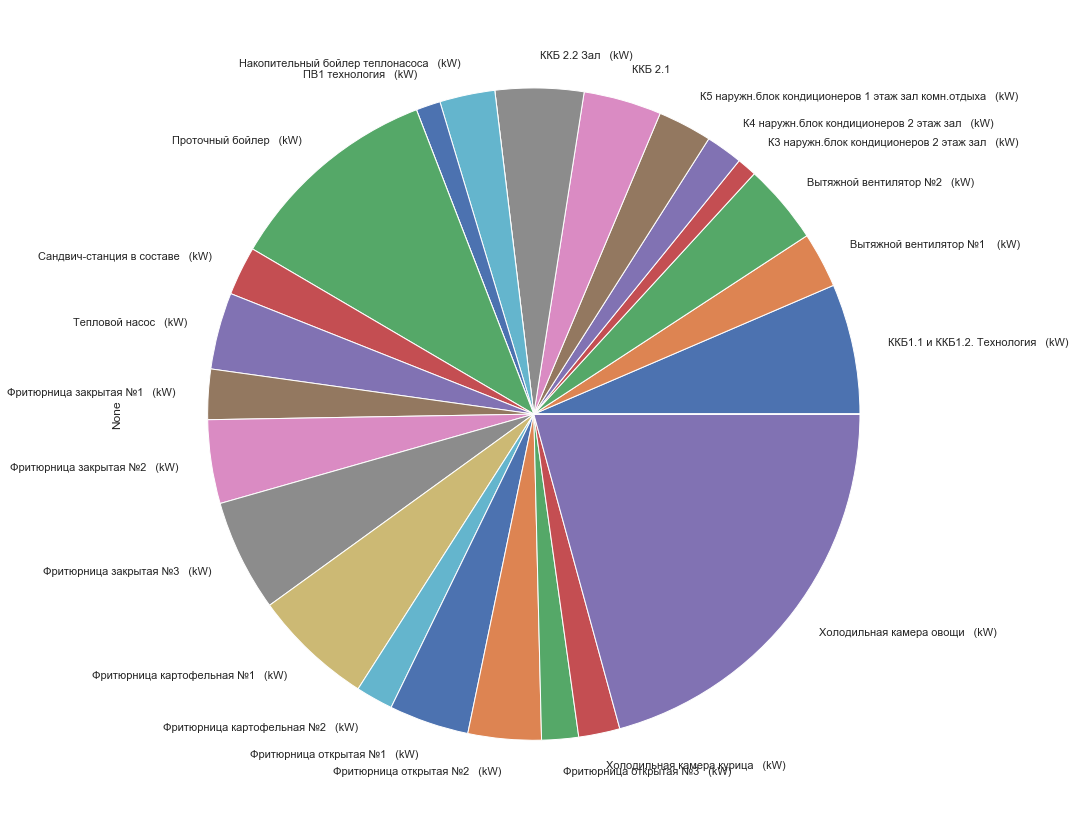

In [196]:
month_structure = food_time.sum(axis=0)
month_structure.plot(kind='pie', figsize=(15, 15))

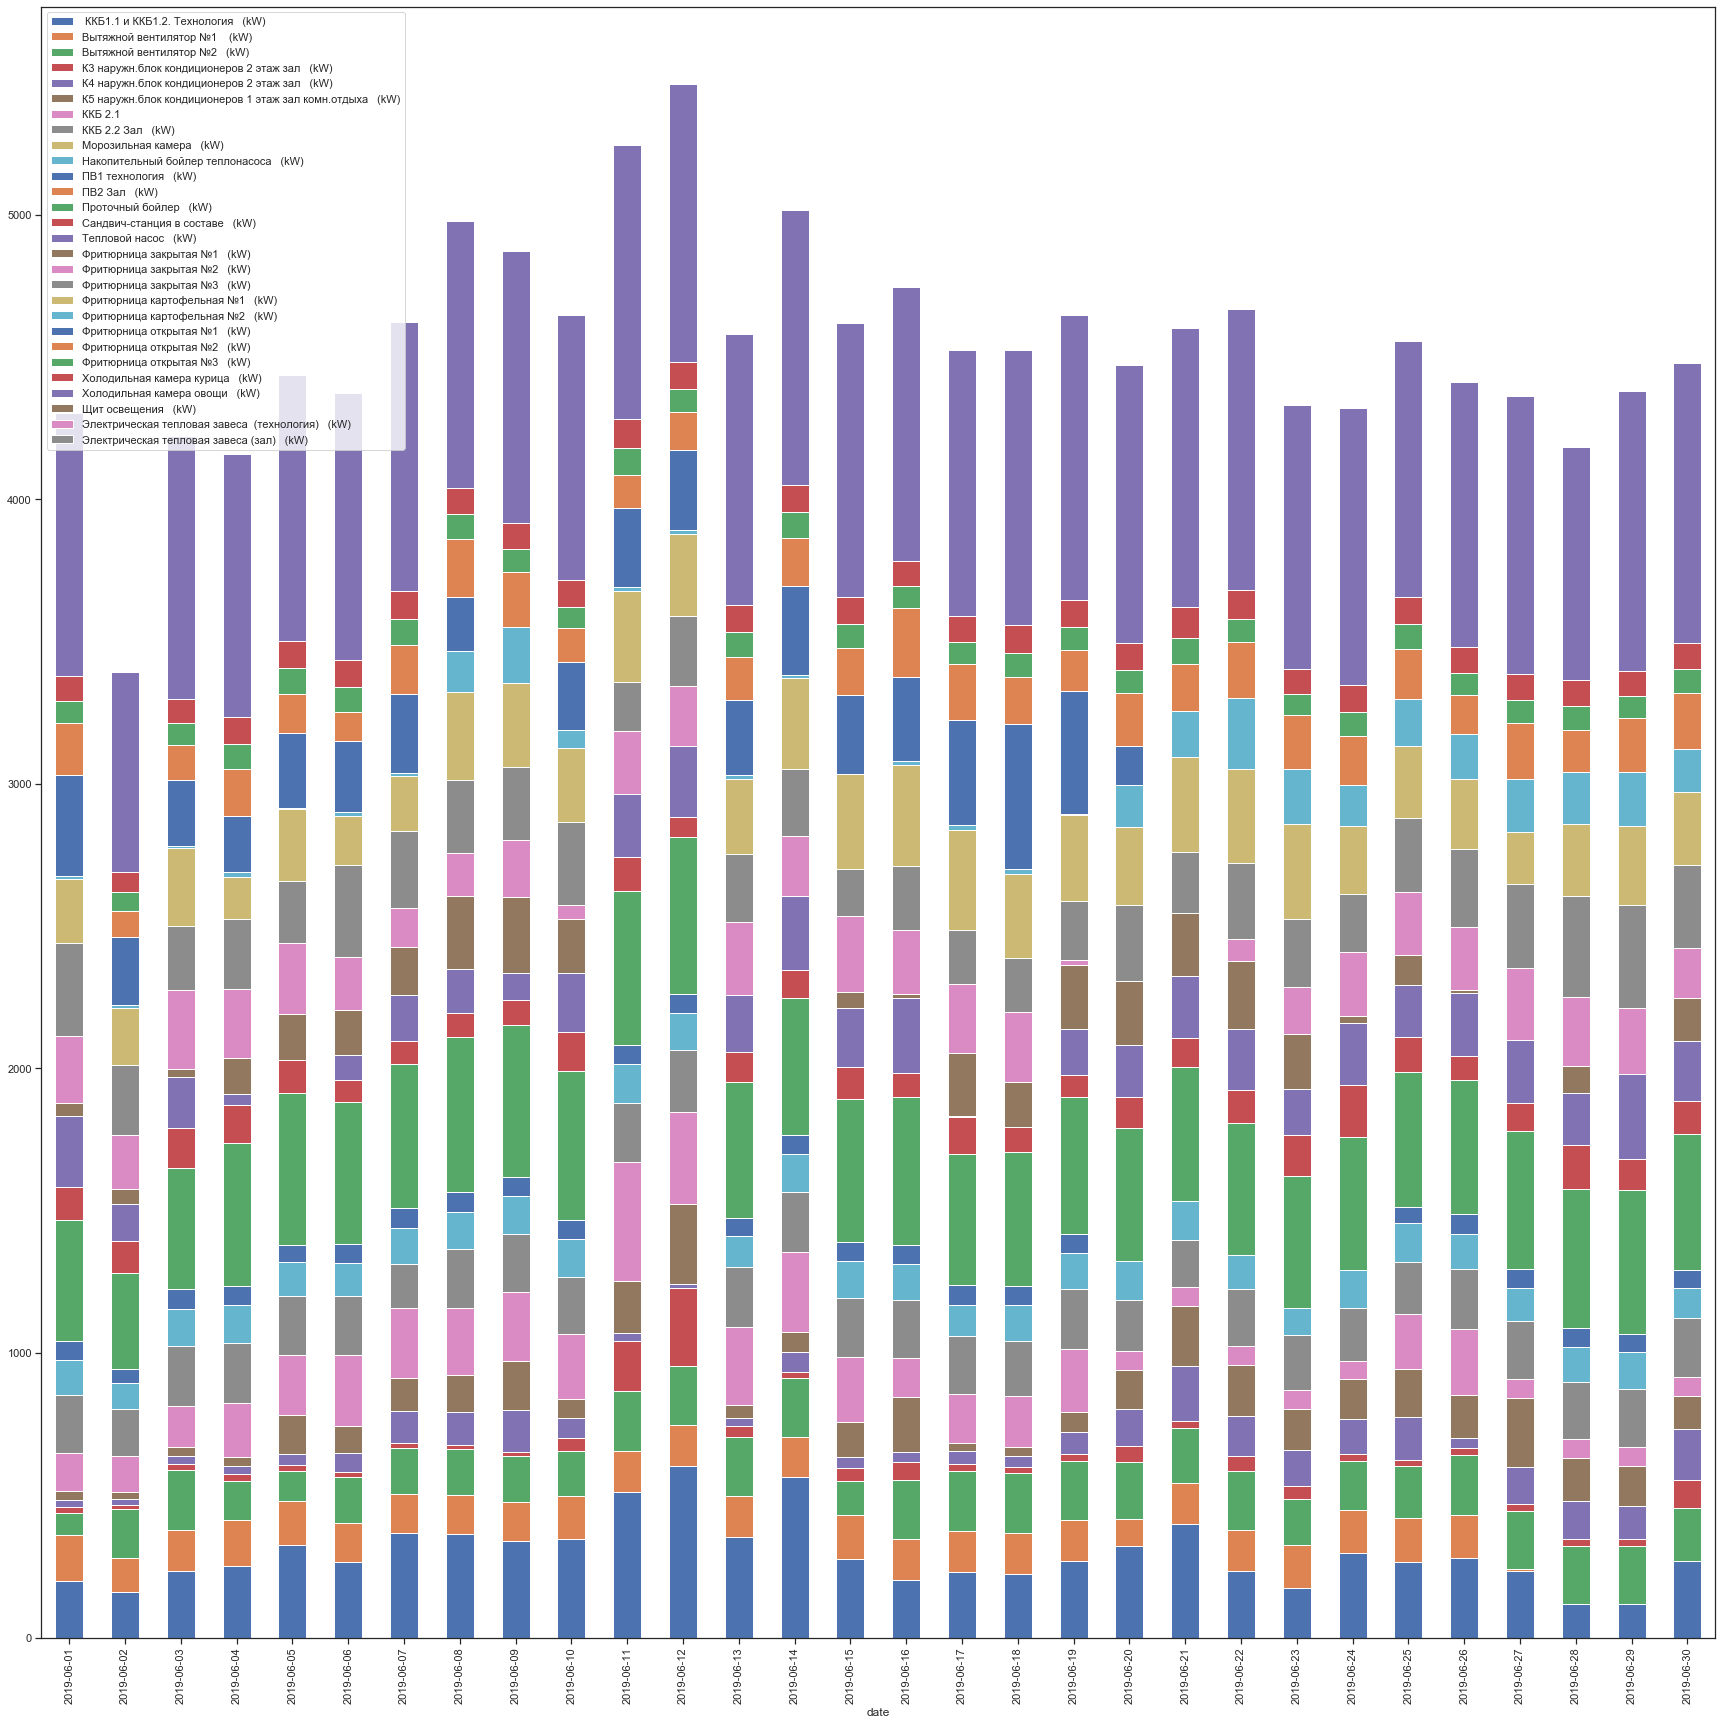

In [229]:
food_date.plot(kind='bar', stacked=True, figsize=(30,30))
#Извиняюсь за размеры графика - легенда банально не влезла бы.

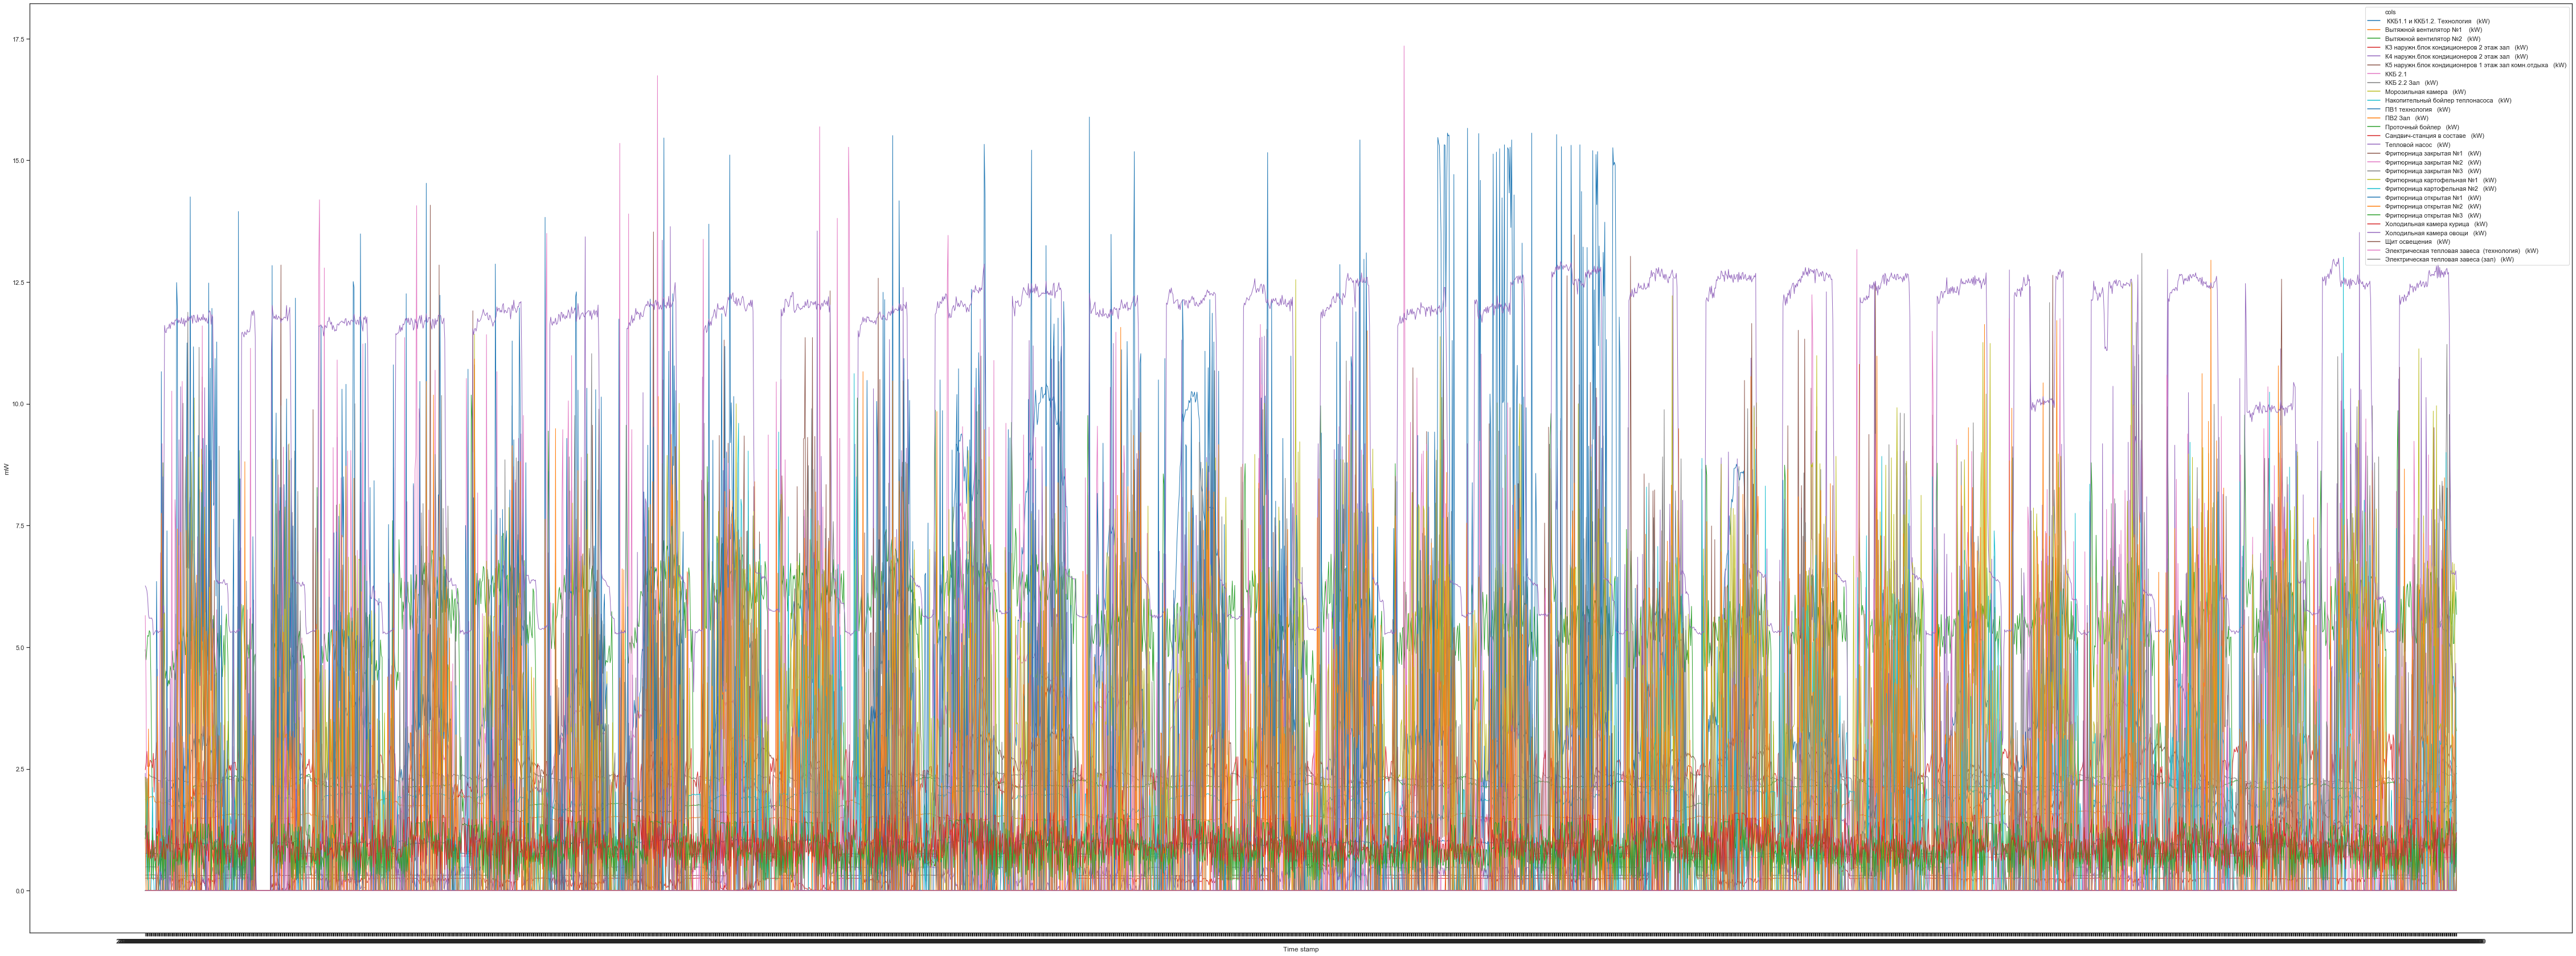

In [216]:
food = food_original.drop(['date', 'time'], axis=1)
food['Time stamp'] = food['Time stamp'].astype(str)
food = food.drop(['Time Stamp'], axis=1)
factor_data = food.melt('Time stamp', var_name='cols',  value_name='mW')
factor_data = factor_data[factor_data['cols'] != 'Restaurant 1 - Total  (kW)']
fig, ax = plt.subplots(figsize = (80,30))
sns.set_style("ticks")
sns.lineplot(x="Time stamp", y="mW", hue='cols', data=factor_data, palette="tab10", linewidth=1)
plt.show()

Пока очень интересно то, что потребление некоторых приборов неравномерно, например бойлер теплонасосов или теплозавеса. Больше всего энергии потребляет холодильная камера (овощи). А также очень интересно, почему потребление 06.02 аномально низкое, а 06.11 и 06.12 - аномально высокое. Исходя из имеющихся данных на этот вопрос не ответить - нужно смотреть как погодные условия, в эти дни, так и интенсивность использования иного оборудования. Возможно - есть некоторые корелляции.

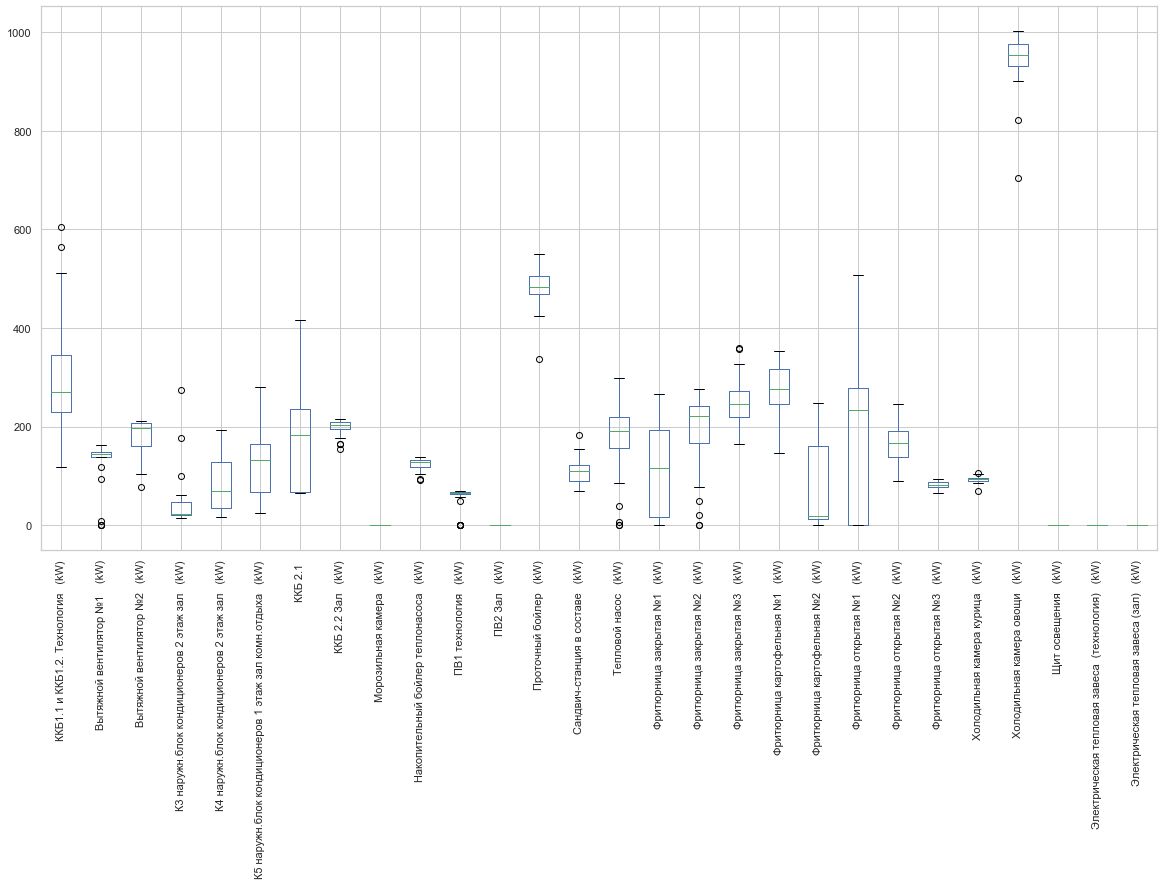

In [207]:
food_date.boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()

Видно, что очень высокое потребление имеет овощная морозильная камера, к тому же имеются выбросы, причем достаточно серьезные. Дисперсия у холодильной камеры очень маленькая, а "хвост" данных уходит влево значит скорее всего - были перебои в работе оборудования. Аналогичная история и с Проточным бойлером. Не уверен, уместно ли тут будет чистить данные - с выбросами лучше разбираться в частном порядке, а потом уже возвращаться к анализу. Но можно посмотреть корелляцию "на глаз", построив pairplot, но это уже в разрезе групп оборудования. Далее посмотрим на потребление каждого вида оборудования по отдельности.

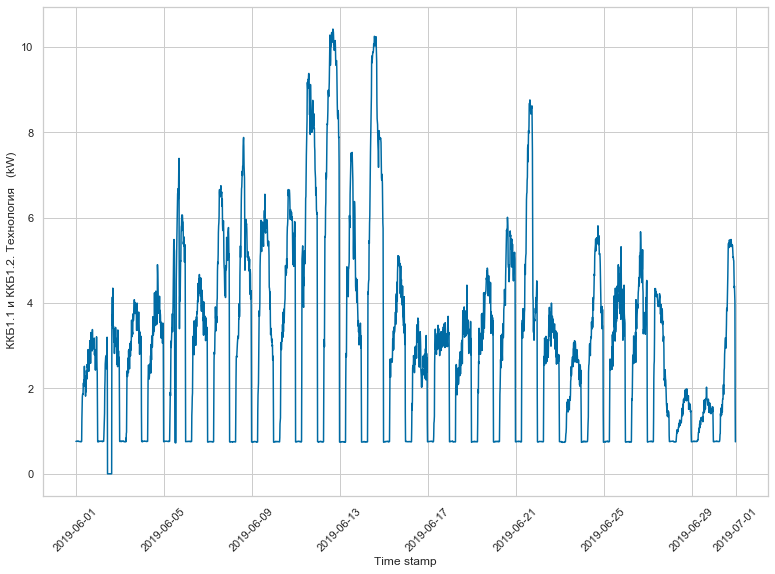

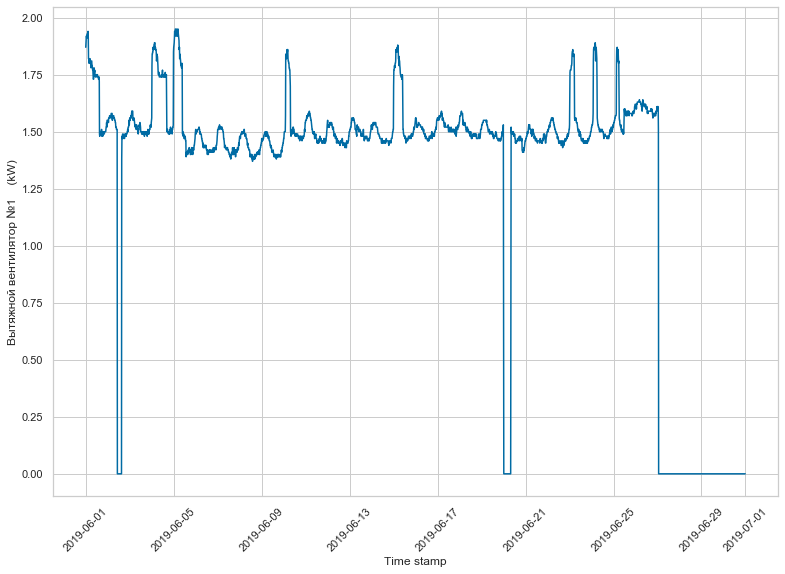

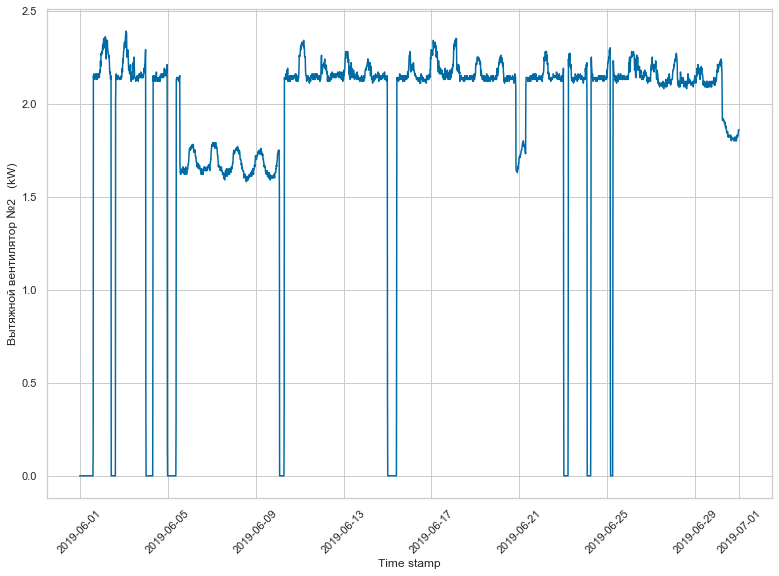

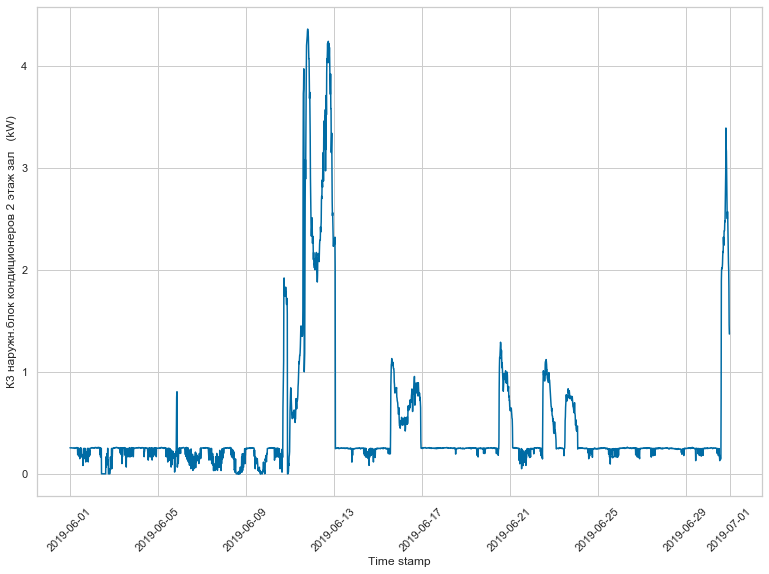

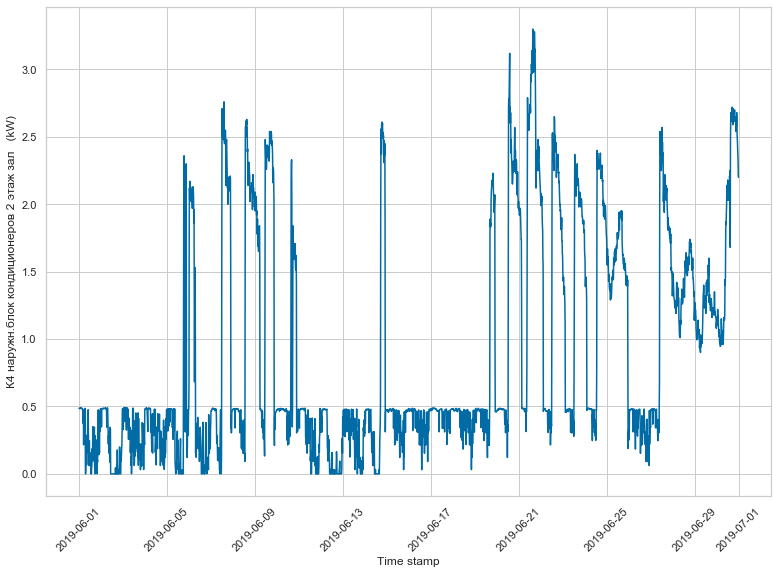

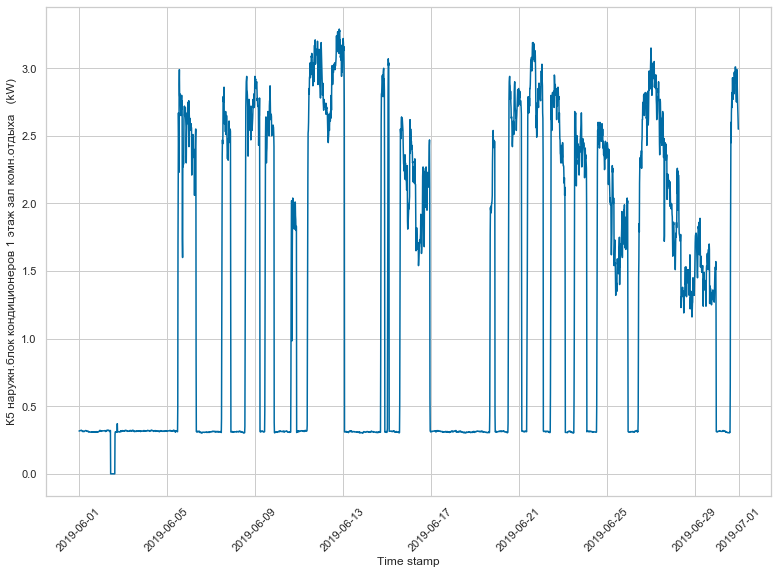

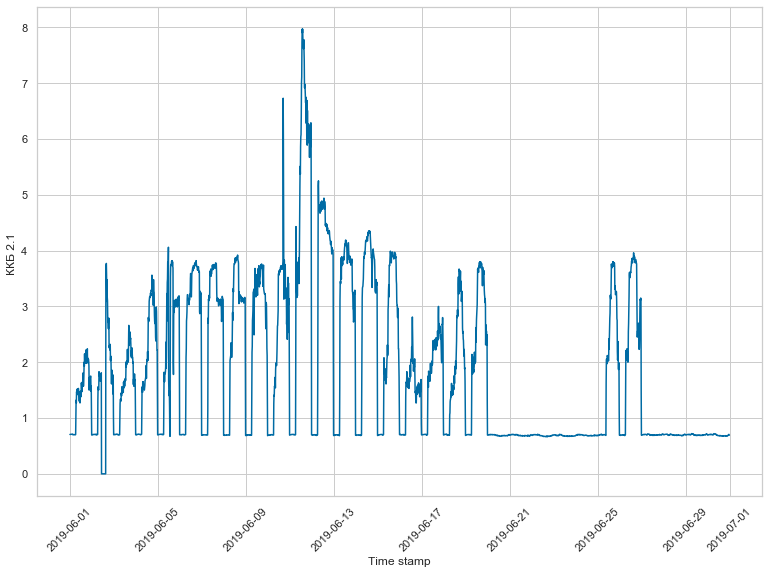

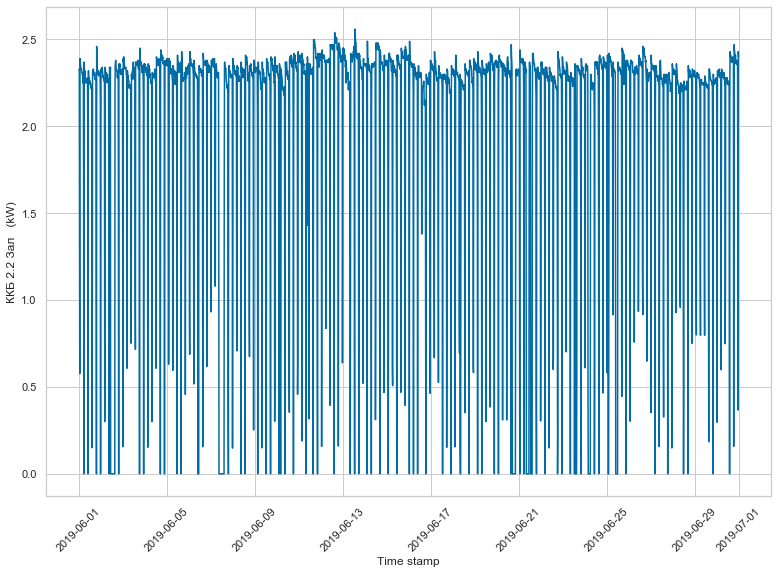

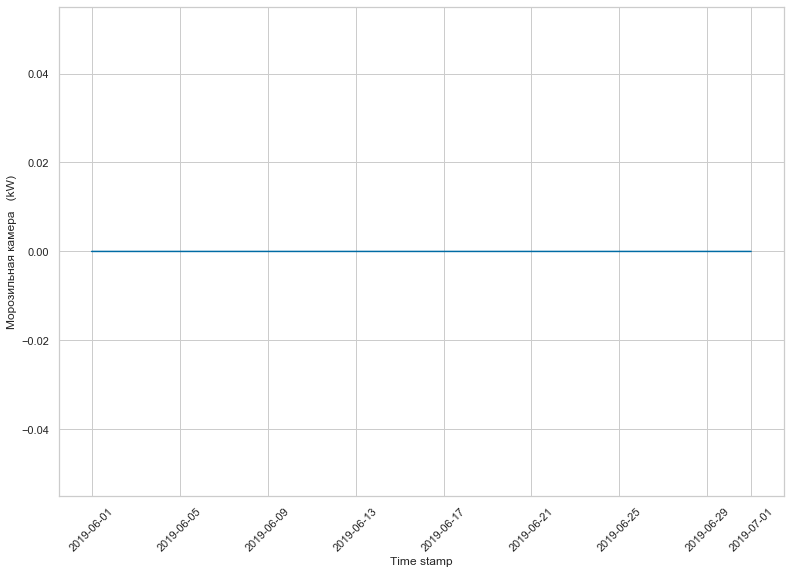

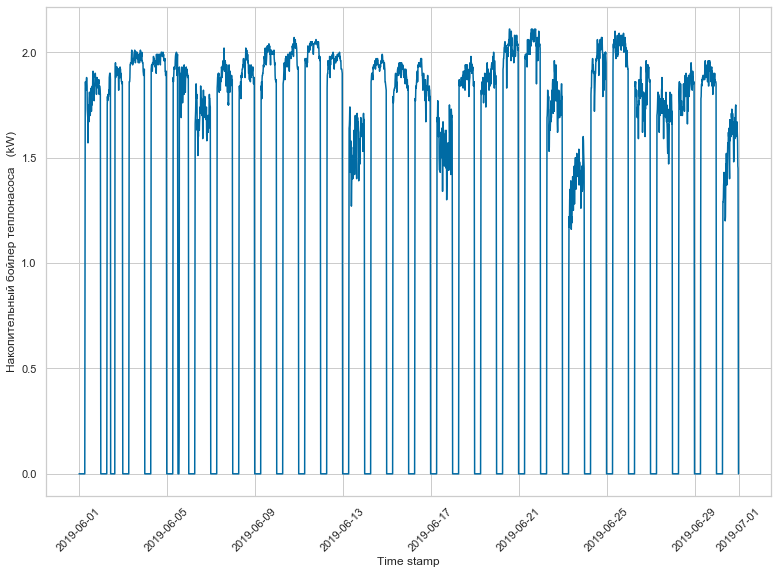

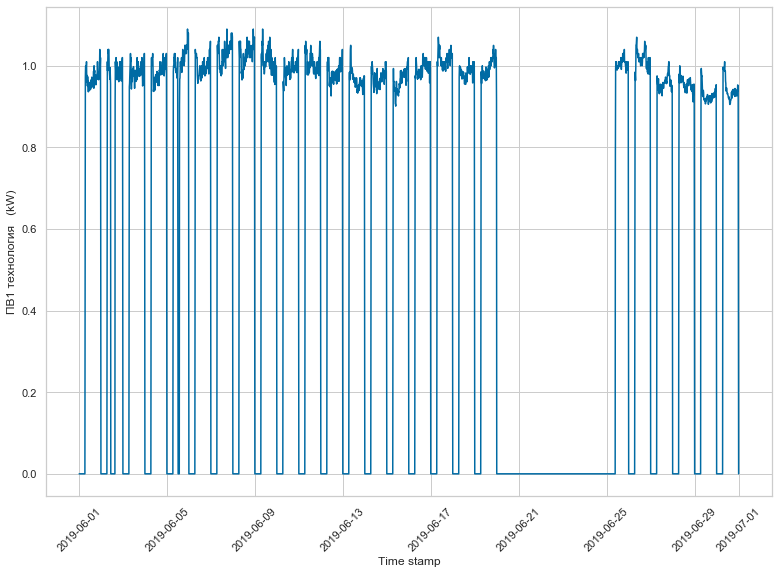

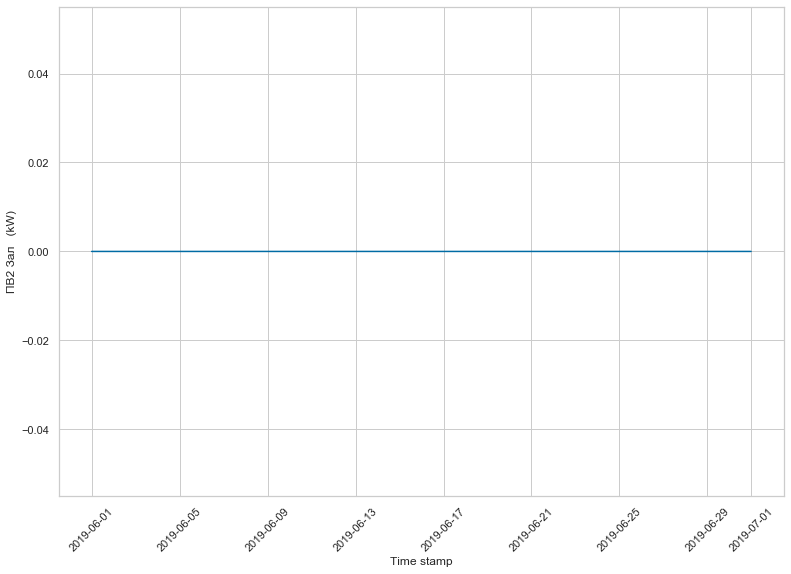

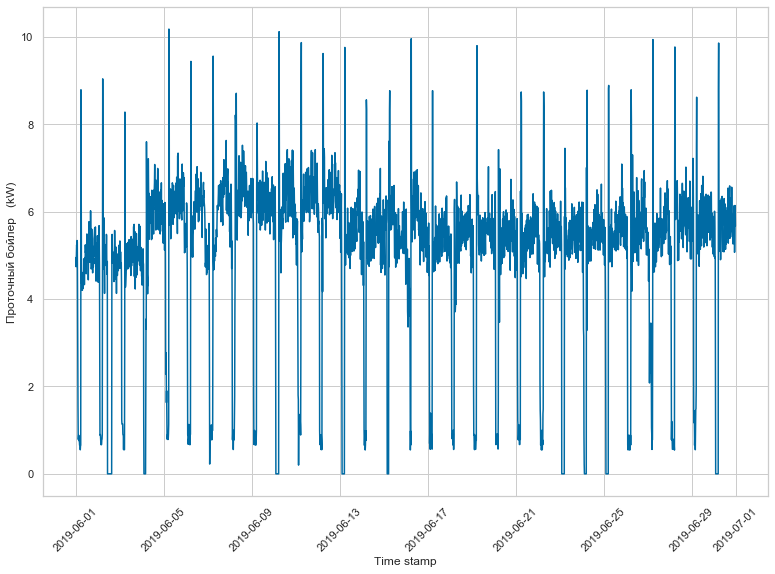

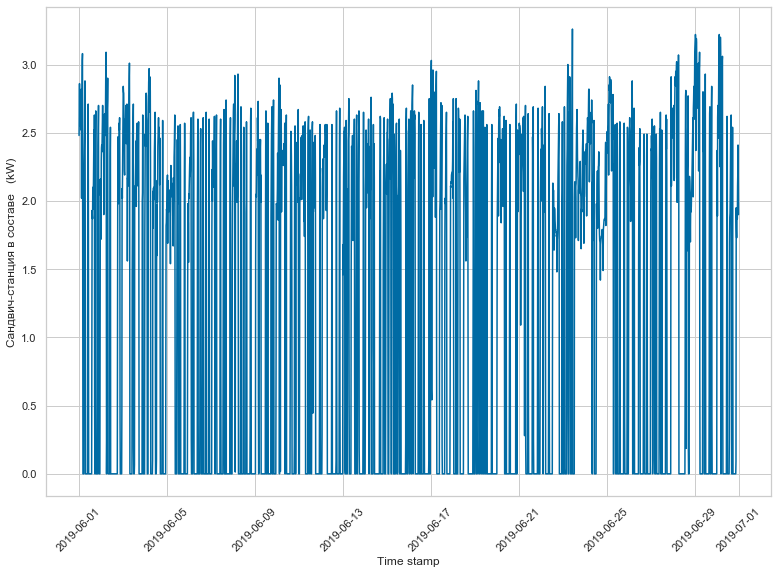

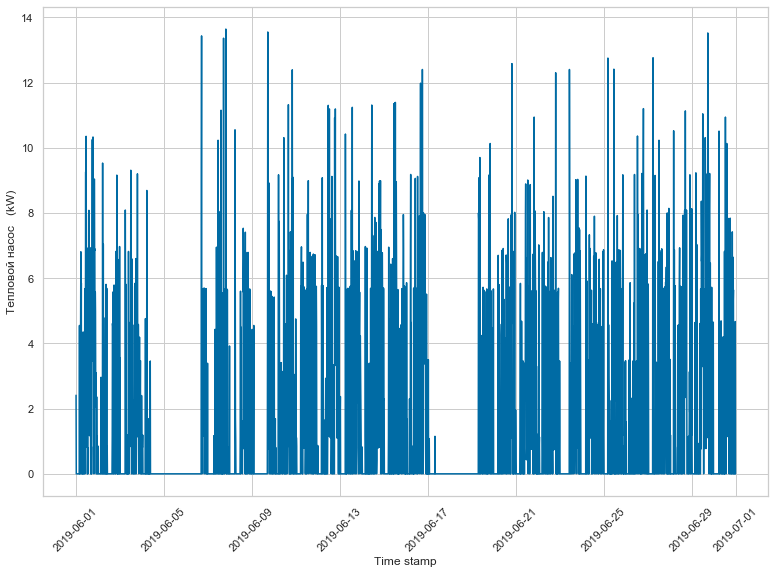

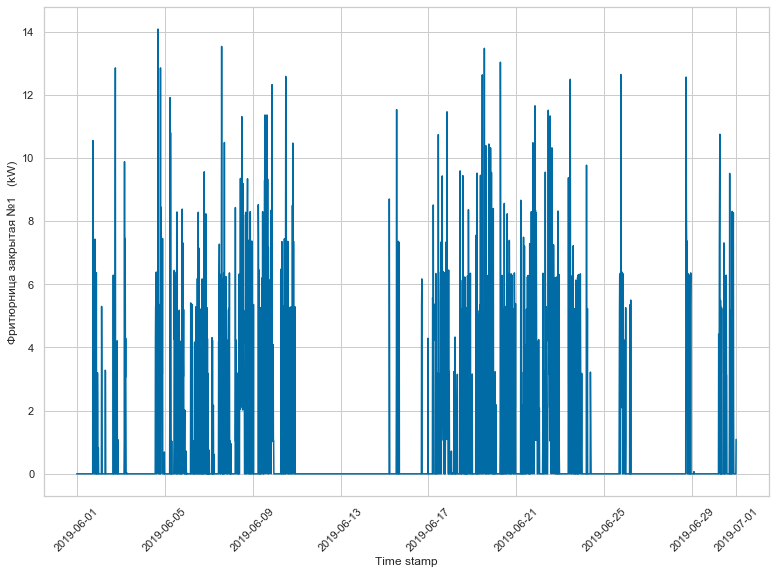

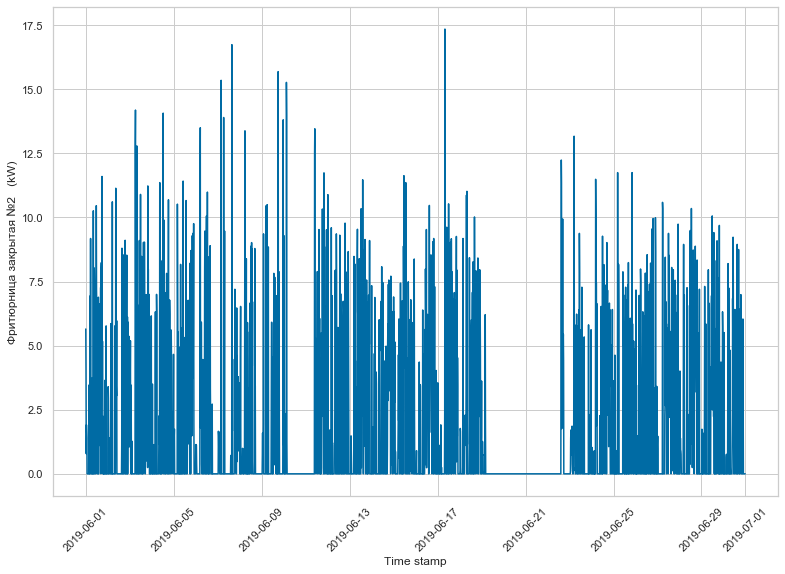

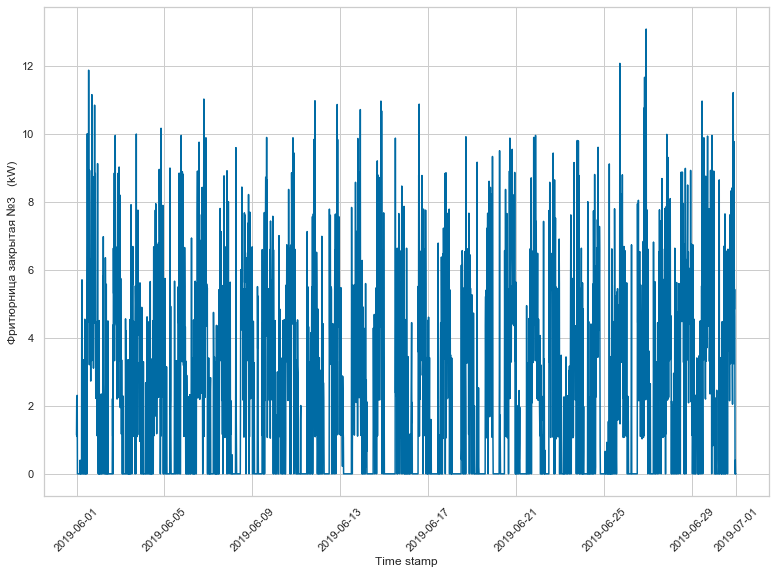

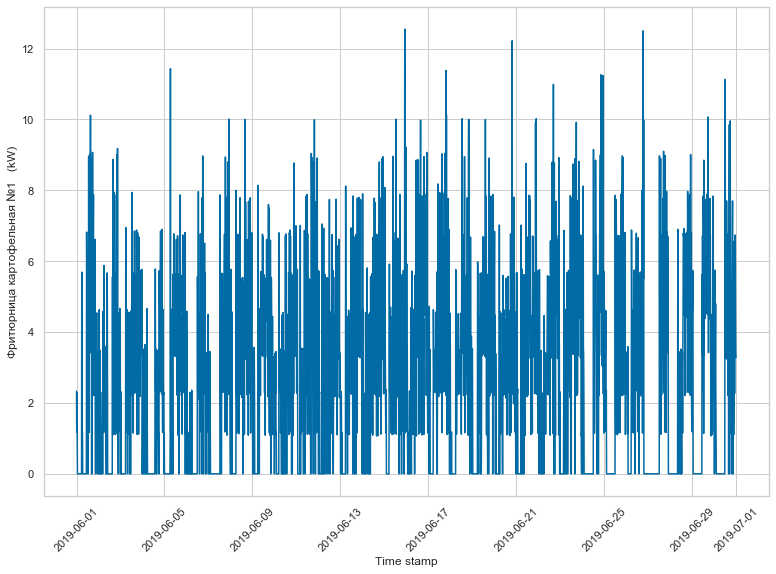

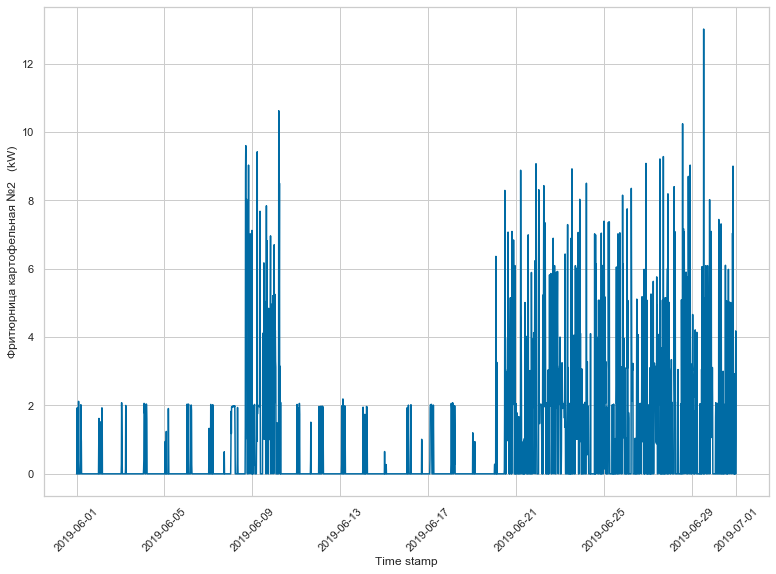

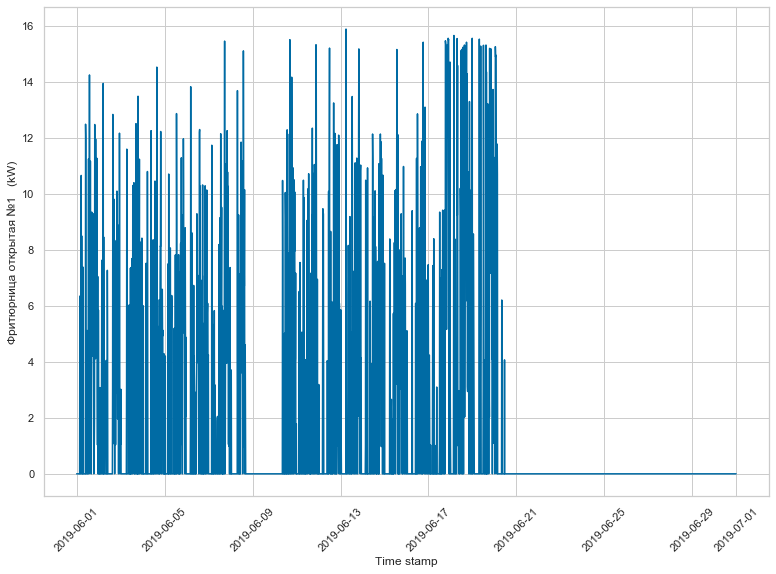

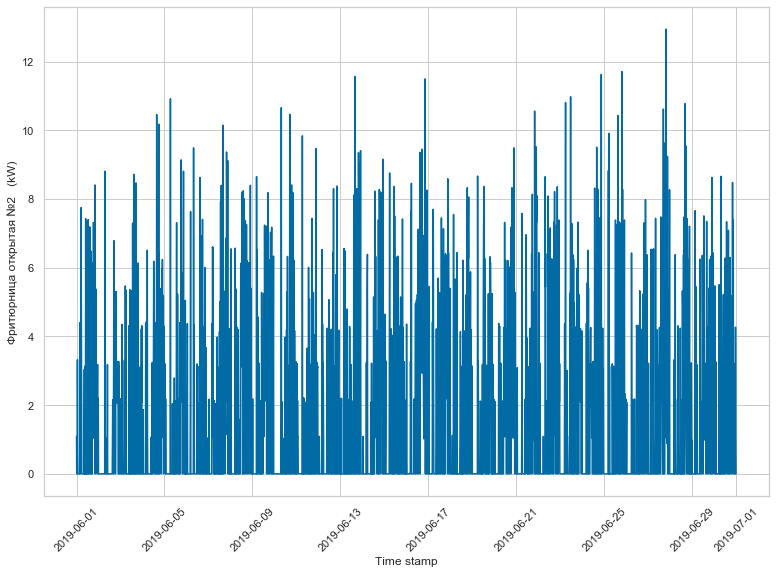

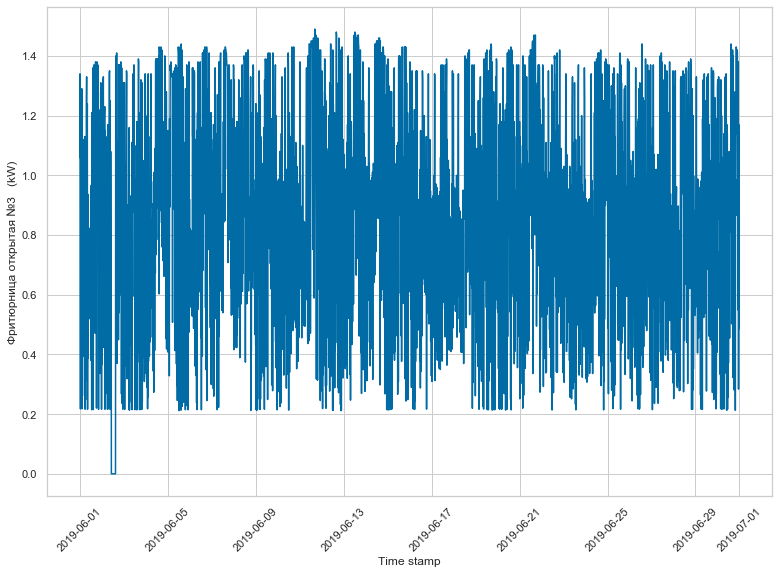

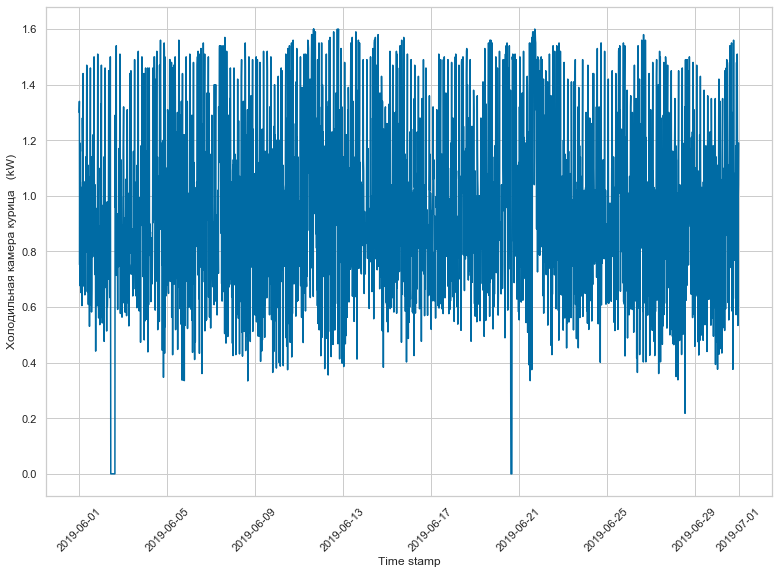

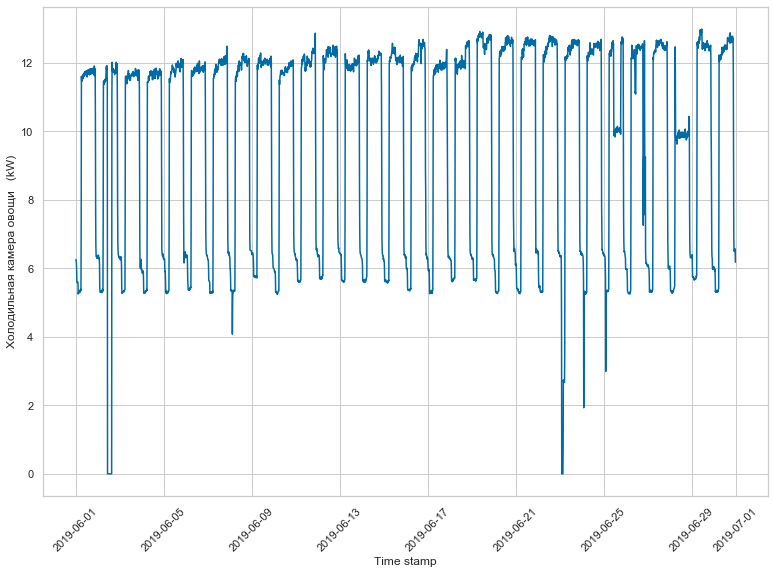

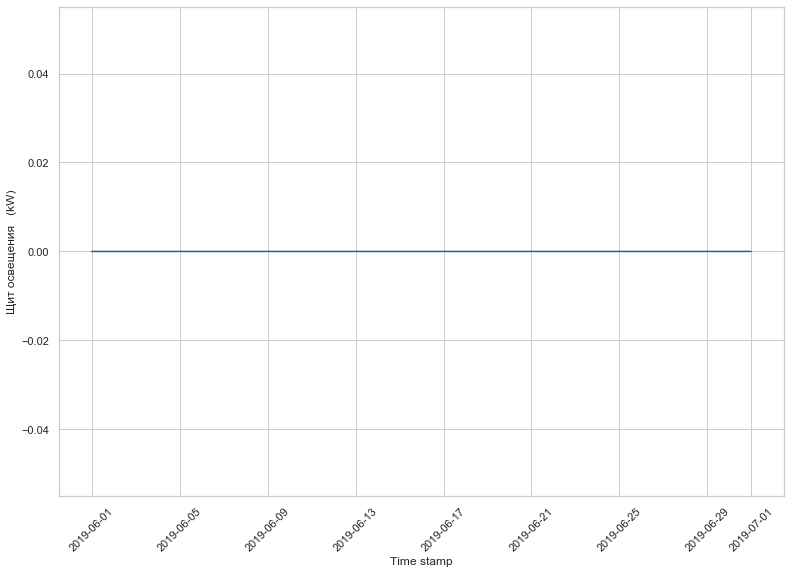

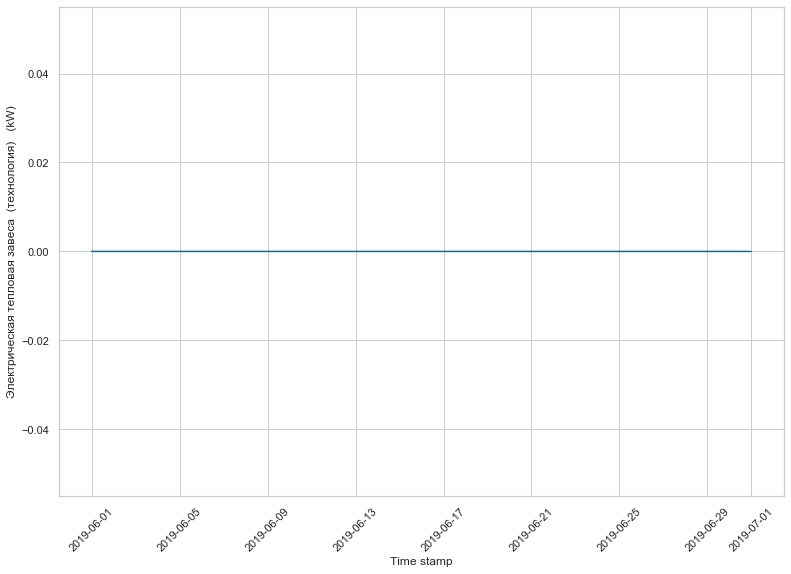

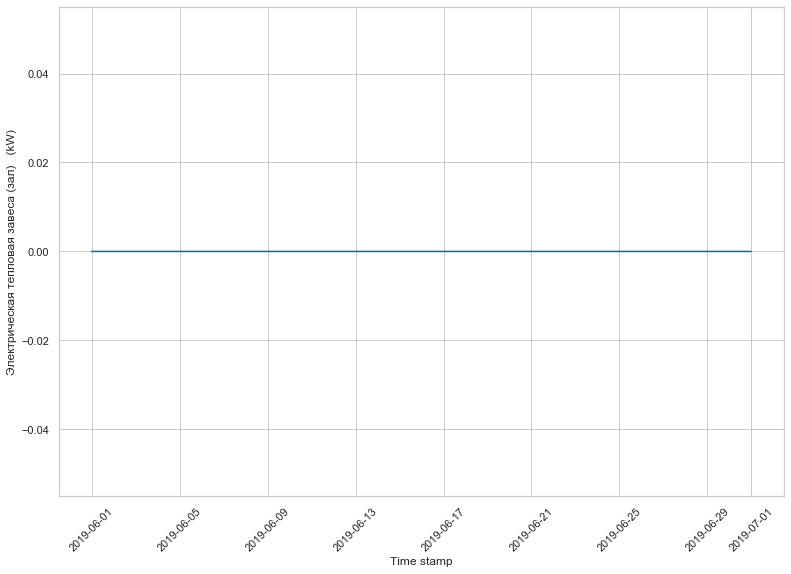

In [169]:
sns.set(style="whitegrid")
for i in range(28):
    fig, ax = plt.subplots(figsize = (13,9))

    sns.lineplot(x = food_time.index, y = food_time.iloc[:, i], color = cb_dark_blue)
    plt.xticks(rotation=45)
    plt.show()


Также после первичного анализа можно выделить следующие аномалии: 

1) С 20х чисел нарушена работа Вытяжного Вентилятора №1. Не использовался. Также наблюдается просадка Вентилятора №2 с 06 по 09.06 Просадка была небольшая, визуально корреляция между интенсивностью работы вентиляторов отсутствует. 

2) 10-12.06, а также 30.06 наблюдалась аномальная активность кондиционера на 2-м этаже. Наружный блок второго этажа также работал неравномерно - наблюдалась скачкообразная активность. 

3) ККБ 2.1 имеет аномально высокие значения 10-14.06, а также перебои в работе 20-25 и 27-31.06. 

4) По морозильной камере, ПВ2(Зал), Щиту освещения, эл. тепловой завесам (технология, зал) данных нет - графики показывают нулевые значения. Любопытно, что первичный анализ подсчета нулевых значений это не показал. 

5) ПВ1 (Технология) перебои в работе с 21 по 25.06. 

6) Тепловой насос - перебои в работе, множественные. Возможно - это нормально, но я не очень хорошо понимаю принцип его работы. 

7) Фритюрница закрытая - перебои 10-11.06 и 18-23.06. 

8) Фритюрница картофельная №2 - Аномально высокая интенсивность работы 09.06 Резкое повышене интенсивности работы в конце месяца. Обратные значения интенсивности набюлдаются в работе фритюрницы открытой №1. Визуально - прямая корреляция. 

9) Холодильная камера (овощи) - два кратковременных сбоя в работе (падения потребления до нулевого значения). Вероятно, это входит в обычный режим эксплуатации данного оборудования. Чтобы проверить нужно посмотреть дополнительно данные по другим месяцам. 

10) Все данные примерно 03.06 имеют кратковременную просадку. Посмотрев .csv файл, там действительно есть период, когда данных нет по всему оборудованию. Нужно разбираться в частном порядке, гипотеза  - наблюдалось кратковременное отключение электроэнергии. Но - нужно проверять в частном порядке. 

Теперь разобъем данные на подгруппы. Тут можно отдельно выделить: 

1) Оборудование для готовки (фритюрницы, сэндвич - станция)

2) Внешнее освещение

3) Системы кондиционирования

4) Системы сохранения продуктов питания (холодильные и морозильные камеры)

Сразу стоит отметить, что группу данных "Внешнее освещение" анализировать не имеет смысла, так как данных по ней нет (нулевые значения)
Посмотрим на потребление и взаимозависимости в этих данных.

In [191]:
food_original.dtypes

Time stamp                                                    datetime64[ns]
 ККБ1.1 и ККБ1.2. Технология   (kW)                                  float64
Restaurant 1 - Total  (kW)                                           float64
Вытяжной вентилятор №1    (kW)                                       float64
Вытяжной вентилятор №2   (kW)                                        float64
К3 наружн.блок кондиционеров 2 этаж зал   (kW)                       float64
К4 наружн.блок кондиционеров 2 этаж зал   (kW)                       float64
К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)           float64
ККБ 2.1                                                              float64
ККБ 2.2 Зал   (kW)                                                   float64
Морозильная камера   (kW)                                            float64
Накопительный бойлер теплонасоса   (kW)                              float64
ПВ1 технология   (kW)                                                float64

In [333]:
food_cook = food_original[['Сандвич-станция в составе   (kW)',
                           'Фритюрница закрытая №1   (kW)',
                           'Фритюрница закрытая №2   (kW)',
                           'Фритюрница закрытая №3   (kW)',
                           'Фритюрница картофельная №1   (kW)',
                           'Фритюрница картофельная №2   (kW)', 
                           'Фритюрница открытая №1   (kW)',
                           'Фритюрница открытая №2   (kW)',
                           'Фритюрница открытая №3   (kW)', 'date']]
food_cook = food_cook.groupby('date').agg('sum')
food_cook.head()

Сандвич-станция в составе   (kW)  Фритюрница закрытая №1   (kW)  \
date                                                                          
2019-06-01                          116.3814                        45.1966   
2019-06-02                          111.5705                        50.0200   
2019-06-03                          141.7266                        27.9358   
2019-06-04                          130.8691                       125.4109   
2019-06-05                          113.4183                       161.2808   

            Фритюрница закрытая №2   (kW)  Фритюрница закрытая №3   (kW)  \
date                                                                       
2019-06-01                       236.1304                       327.5881   
2019-06-02                       190.2212                       245.8300   
2019-06-03                       275.9158                       224.3057   
2019-06-04                       245.1453                       245.1645   
2019-06-05                       250.7432                       218.6979   

            Фритюрница картофельная №1   (kW)  \
date                                            
2019-06-01                             224.64   
2019-06-02                             200.33   
2019-06-03                             275.73   
2019-06-04                             146.01   
2019-06-05                             252.38   

            Фритюрница картофельная №2   (kW)  Фритюрница открытая №1   (kW)  \
date                                                                           
2019-06-01                            11.2830                       355.0500   
2019-06-02                            10.6887                       241.6740   
2019-06-03                             8.5156                       229.7734   
2019-06-04                            17.1223                       198.6137   
2019-06-05                             5.3322                       262.2013   

            Фритюрница открытая №2   (kW)  Фритюрница открытая №3   (kW)  
date                                                                      
2019-06-01                       180.0700                        77.6209  
2019-06-02                        89.9000                        65.8699  
2019-06-03                       124.9956                        74.5796  
2019-06-04                       164.9300                        88.2301  
2019-06-05                       136.0037                        91.5063

In [332]:
food_cond = food_original[['Вытяжной вентилятор №1    (kW)',
                         'Вытяжной вентилятор №2   (kW)',
                         'К3 наружн.блок кондиционеров 2 этаж зал   (kW)',
                         'К4 наружн.блок кондиционеров 2 этаж зал   (kW)',
                         'К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)',
                         'ККБ 2.2 Зал   (kW)',
                         'date']]
food_cond = food_cond.groupby('date').agg('sum')
food_cond.head()

Вытяжной вентилятор №1    (kW)  Вытяжной вентилятор №2   (kW)  \
date                                                                        
2019-06-01                          161.97                        77.9709   
2019-06-02                          117.46                       170.8700   
2019-06-03                          145.97                       210.4900   
2019-06-04                          163.20                       136.9489   
2019-06-05                          154.89                       103.7904   

            К3 наружн.блок кондиционеров 2 этаж зал   (kW)  \
date                                                         
2019-06-01                                         21.1666   
2019-06-02                                         14.8143   
2019-06-03                                         21.9297   
2019-06-04                                         22.7535   
2019-06-05                                         21.9270   

            К4 наружн.блок кондиционеров 2 этаж зал   (kW)  \
date                                                         
2019-06-01                                         25.9865   
2019-06-02                                         20.5780   
2019-06-03                                         27.6092   
2019-06-04                                         30.9606   
2019-06-05                                         39.1106   

            К5 наружн.блок кондиционеров 1 этаж зал комн.отдыха   (kW)  \
date                                                                     
2019-06-01                                            30.0748            
2019-06-02                                            24.3480            
2019-06-03                                            30.4386            
2019-06-04                                            30.4425            
2019-06-05                                           138.5715            

            ККБ 2.2 Зал   (kW)  
date                            
2019-06-01            202.0635  
2019-06-02            165.3433  
2019-06-03            208.0956  
2019-06-04            209.9664  
2019-06-05            208.5899

In [334]:
food_cool = food_original[['Тепловой насос   (kW)',
                          'Холодильная камера курица   (kW)',
                          'Холодильная камера овощи   (kW)',
                          'Морозильная камера   (kW)', 'date'
                          ]]
food_cool = food_cool.groupby('date').agg('sum')
food_cool.head()

Тепловой насос   (kW)  Холодильная камера курица   (kW)  \
date                                                                  
2019-06-01               250.5211                           88.7287   
2019-06-02               132.1531                           70.4485   
2019-06-03               178.5811                           87.3785   
2019-06-04                39.8383                           95.1110   
2019-06-05                 0.0000                           94.9893   

            Холодильная камера овощи   (kW)  Морозильная камера   (kW)  
date                                                                    
2019-06-01                           924.53                        0.0  
2019-06-02                           704.70                        0.0  
2019-06-03                           922.95                        0.0  
2019-06-04                           923.03                        0.0  
2019-06-05                           934.10                        0.0

Посмотрим на график работы каждого из них по отдельности. 

### Кухонное оборудование

In [258]:
food_cook.describe()

Сандвич-станция в составе   (kW)  Фритюрница закрытая №1   (kW)  \
count                         30.000000                      30.000000   
mean                         110.124030                     112.900437   
std                           25.984427                      93.797232   
min                           69.465300                       0.000000   
25%                           89.035825                      17.697500   
50%                          110.799600                     115.985450   
75%                          122.786425                     192.724125   
max                          183.026400                     266.666300   

       Фритюрница закрытая №2   (kW)  Фритюрница закрытая №3   (kW)  \
count                      30.000000                      30.000000   
mean                      188.073960                     251.856307   
std                        80.178395                      49.110832   
min                         0.000000                     165.090000   
25%                       166.949725                     220.099850   
50%                       220.843000                     246.659700   
75%                       242.762775                     271.899525   
max                       275.915800                     359.686600   

       Фритюрница картофельная №1   (kW)  Фритюрница картофельная №2   (kW)  \
count                           30.00000                          30.000000   
mean                           271.13400                          83.962027   
std                             54.49332                          83.450329   
min                            146.01000                           1.186500   
25%                            246.10750                          12.240575   
50%                            275.76000                          18.229200   
75%                            316.42000                         160.231000   
max                            354.25000                         247.387800   

       Фритюрница открытая №1   (kW)  Фритюрница открытая №2   (kW)  \
count                      30.000000                      30.000000   
mean                      179.767773                     164.456497   
std                       154.591264                      34.513563   
min                         0.000000                      89.900000   
25%                         0.000000                     137.806325   
50%                       234.376700                     167.915000   
75%                       278.128325                     190.912750   
max                       507.626500                     245.180000   

       Фритюрница открытая №3   (kW)  
count                      30.000000  
mean                       82.779687  
std                         6.470422  
min                        65.869900  
25%                        77.518675  
50%                        82.753050  
75%                        87.772100  
max                        93.514300

Если рассматривать по минутам, то будет сложно строить диаграммы - слишком маленькие значения. Поэтому будем анализировать даннные в разрезе каждого отдельного дня и при необходимости - агрегируем по отдельным часам. 

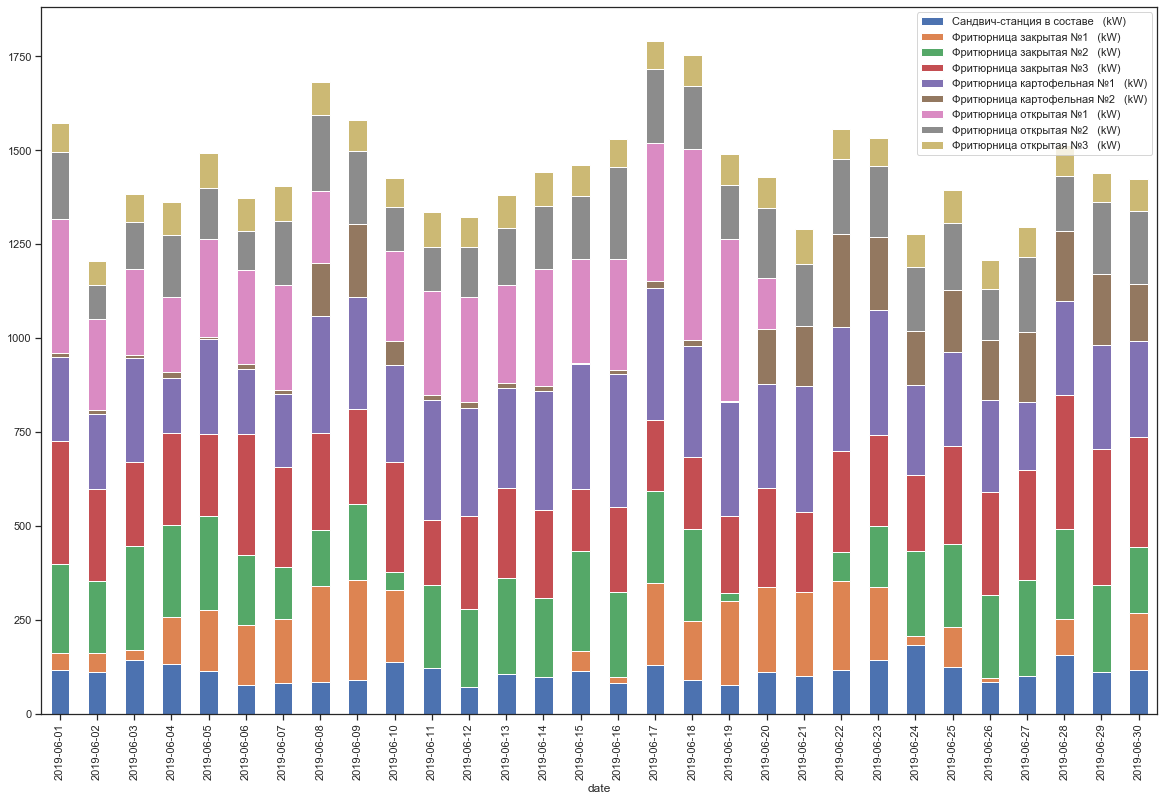

In [262]:
#Структура использования по дням
food_cook.plot(kind='bar', stacked=True, figsize=(20, 13))

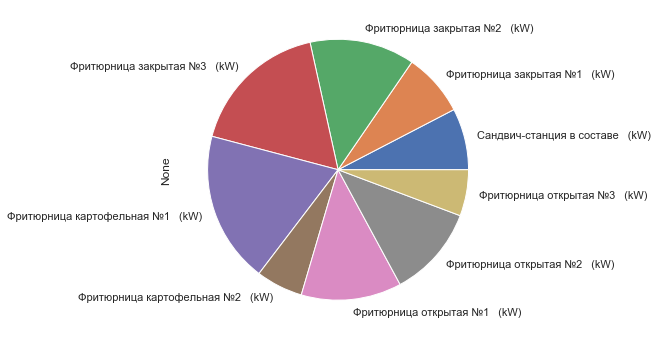

In [269]:
#Среднее использование в день
month_food_structure = food_cook.mean(axis=0)
month_food_structure.plot(kind='pie', figsize=(6, 6))

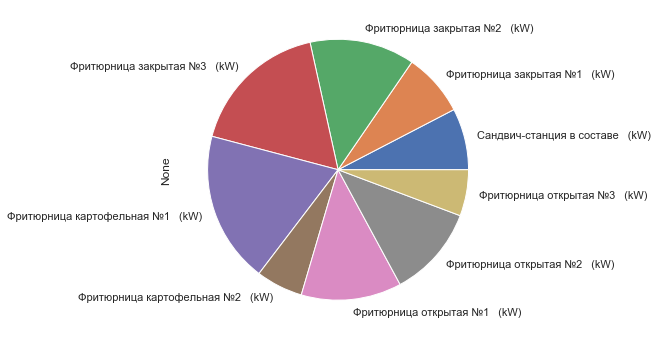

In [270]:
# Итоговое потребление за месяц, структура (mW)
month_food_structure = food_cook.sum(axis=0)
month_food_structure.plot(kind='pie', figsize=(6, 6))

Структура использования сильно не отличается внутри группы. Детально мы уже разобрали каждый из типов оборудования. 

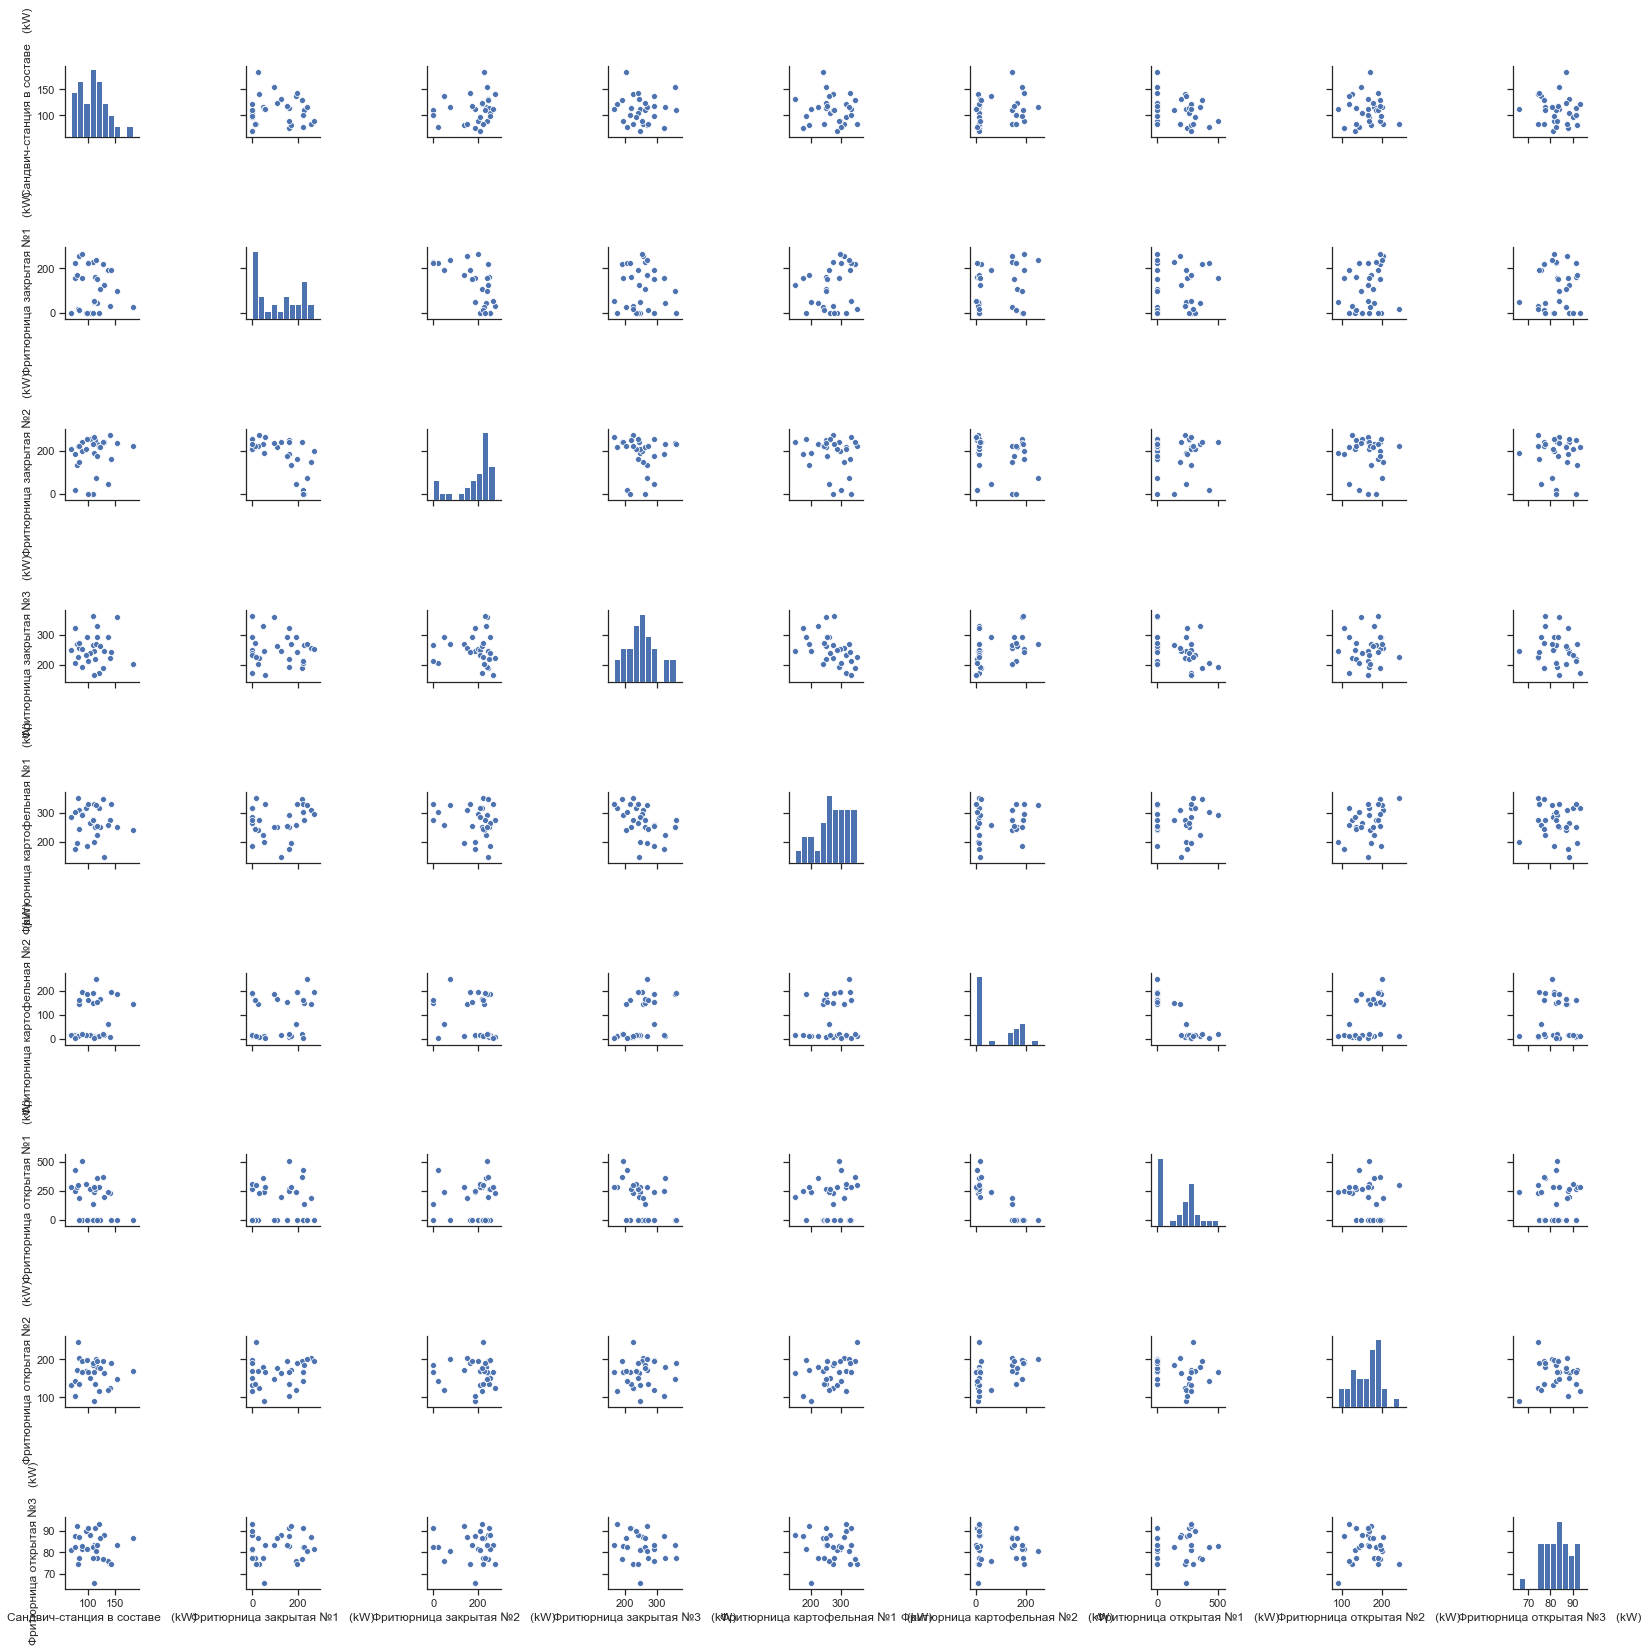

In [271]:
sns.pairplot(data=food_cook)

In [280]:
cook_corr = food_cook.corr(method='spearman')
cook_corr

Сандвич-станция в составе   (kW)  \
Сандвич-станция в составе   (kW)                           1.000000   
Фритюрница закрытая №1   (kW)                             -0.003344   
Фритюрница закрытая №2   (kW)                              0.278785   
Фритюрница закрытая №3   (kW)                             -0.059844   
Фритюрница картофельная №1   (kW)                         -0.073637   
Фритюрница картофельная №2   (kW)                          0.197330   
Фритюрница открытая №1   (kW)                             -0.331461   
Фритюрница открытая №2   (kW)                             -0.028699   
Фритюрница открытая №3   (kW)                             -0.107008   

                                   Фритюрница закрытая №1   (kW)  \
Сандвич-станция в составе   (kW)                       -0.003344   
Фритюрница закрытая №1   (kW)                           1.000000   
Фритюрница закрытая №2   (kW)                          -0.566397   
Фритюрница закрытая №3   (kW)                           0.008696   
Фритюрница картофельная №1   (kW)                       0.221405   
Фритюрница картофельная №2   (kW)                       0.228094   
Фритюрница открытая №1   (kW)                          -0.154783   
Фритюрница открытая №2   (kW)                           0.267336   
Фритюрница открытая №3   (kW)                           0.019844   

                                   Фритюрница закрытая №2   (kW)  \
Сандвич-станция в составе   (kW)                        0.278785   
Фритюрница закрытая №1   (kW)                          -0.566397   
Фритюрница закрытая №2   (kW)                           1.000000   
Фритюрница закрытая №3   (kW)                          -0.236734   
Фритюрница картофельная №1   (kW)                      -0.145066   
Фритюрница картофельная №2   (kW)                      -0.250306   
Фритюрница открытая №1   (kW)                           0.175445   
Фритюрница открытая №2   (kW)                          -0.086328   
Фритюрница открытая №3   (kW)                          -0.037824   

                                   Фритюрница закрытая №3   (kW)  \
Сандвич-станция в составе   (kW)                       -0.059844   
Фритюрница закрытая №1   (kW)                           0.008696   
Фритюрница закрытая №2   (kW)                          -0.236734   
Фритюрница закрытая №3   (kW)                           1.000000   
Фритюрница картофельная №1   (kW)                      -0.530590   
Фритюрница картофельная №2   (kW)                       0.462959   
Фритюрница открытая №1   (kW)                          -0.450085   
Фритюрница открытая №2   (kW)                           0.152836   
Фритюрница открытая №3   (kW)                          -0.197330   

                                   Фритюрница картофельная №1   (kW)  \
Сандвич-станция в составе   (kW)                           -0.073637   
Фритюрница закрытая №1   (kW)                               0.221405   
Фритюрница закрытая №2   (kW)                              -0.145066   
Фритюрница закрытая №3   (kW)                              -0.530590   
Фритюрница картофельная №1   (kW)                           1.000000   
Фритюрница картофельная №2   (kW)                           0.033148   
Фритюрница открытая №1   (kW)                               0.216944   
Фритюрница открытая №2   (kW)                               0.328587   
Фритюрница открытая №3   (kW)                              -0.145273   

                                   Фритюрница картофельная №2   (kW)  \
Сандвич-станция в составе   (kW)                            0.197330   
Фритюрница закрытая №1   (kW)                               0.228094   
Фритюрница закрытая №2   (kW)                              -0.250306   
Фритюрница закрытая №3   (kW)                               0.462959   
Фритюрница картофельная №1   (kW)                           0.033148   
Фритюрница картофельная №2   (kW)                           1.000000   
Фритюрница открытая №1   (kW)                           

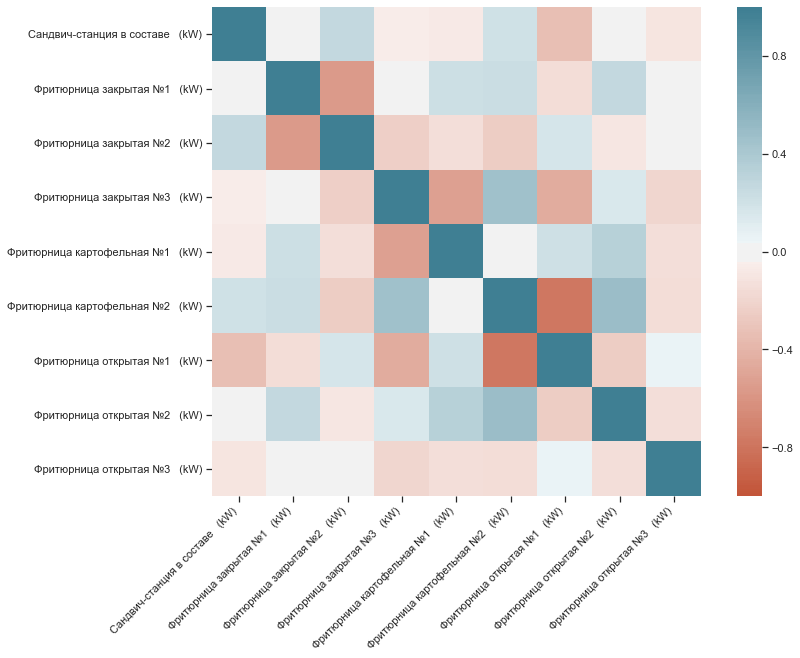

In [285]:
corr = cook_corr
fig, ax= plt.subplots(figsize = (13,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Так как не все данные распределены равномерно, то мы применили коэффициент корреляции Спирмена - для него не требуется нормальность распределения, и выполнено требование к размеру выборки (>= 5).
Так, мы видим, что существует слабая взаимосвязь между использованием Фритюрницы закрытой №1 и фритюрницы закрытой №2. Связь слабая, было бы хорошо исследовать подробнее. Схожим уровнем зависимости (К корр. ~0.5) также обладают: 

1) сандвич-станция в составе и фритюрница закрытая №1; 

2) сандвич-станция в составе и фритюрница закрытая №3;

3) Фритюрница закрытая №3 и фритюрница картофельная №1;

4) Фритюрица открытая №1 и фритюрница картофельная №2.

Также довольно высокую взаимосвязь показали Фритюрница открытая №1 и Фритюрница картофельная №2 (0.77)
Вероятно, эти все данные зависят от количества посетителей в ресторане, размере и структуре среднего чека. То есть - для подробного анализа недостаточно данных. 



### Системы охлаждения

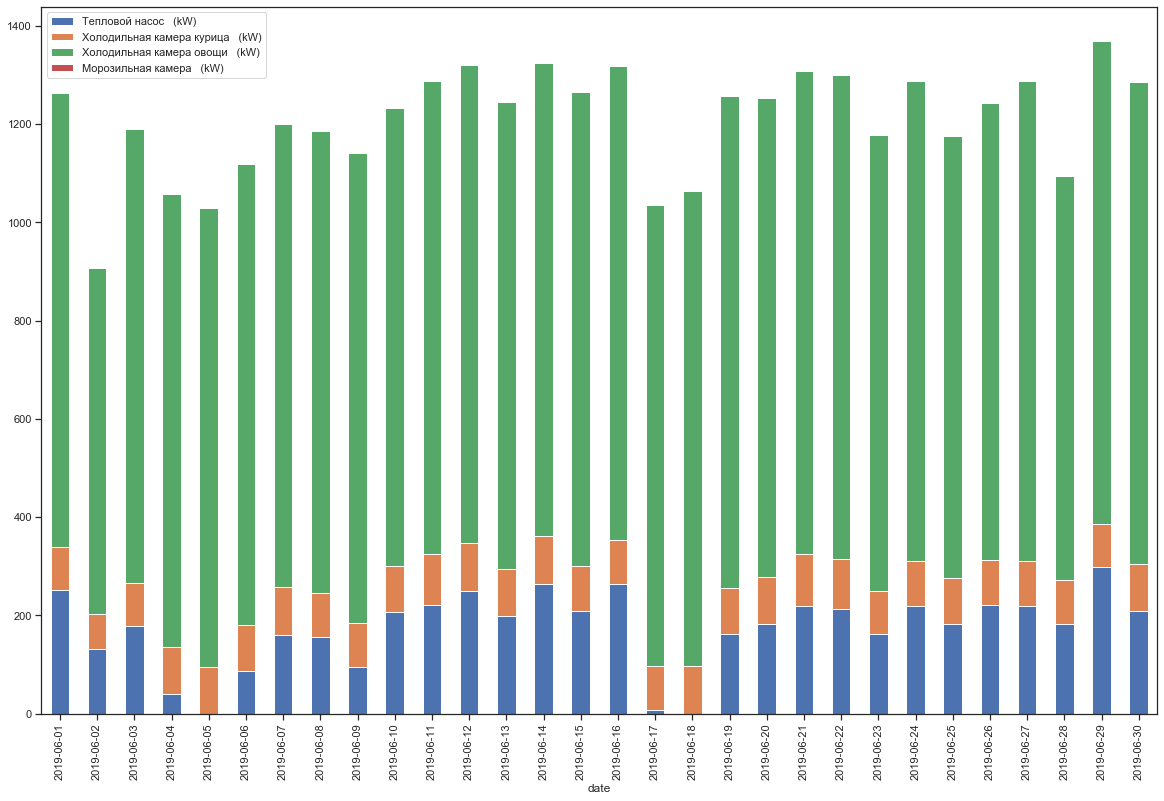

In [290]:
#Структура использования по дням
food_cool.plot(kind='bar', stacked=True, figsize=(20, 13))

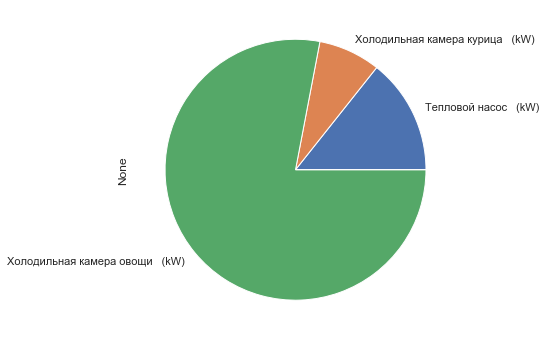

In [291]:
#Среднее использование в день
month_cool_structure = food_cool.mean(axis=0)
month_cool_structure.plot(kind='pie', figsize=(6, 6))

Интересно, что бОльшную часть электроэнергии приходится на холодильную камеру для овощей. Дополнительно было бы интересно посмотреть на размер и оценить эффективность работы холодильной камеры. 

Также было бы хорошо ознакомиться с технологией работы теплового насоса - на данный момент мне не совсем понятно, насколько корректно он работает, так как график использования неравномерный. 

Холодильная камера (Курица) работает стабильно и график использования ритмичен. На данном этапе - все в порядке. 

Данных по морозильной камере нет. Сломана, не используется или данные не работают - сейчас не известно. Нужно исследовать дополнительно. 

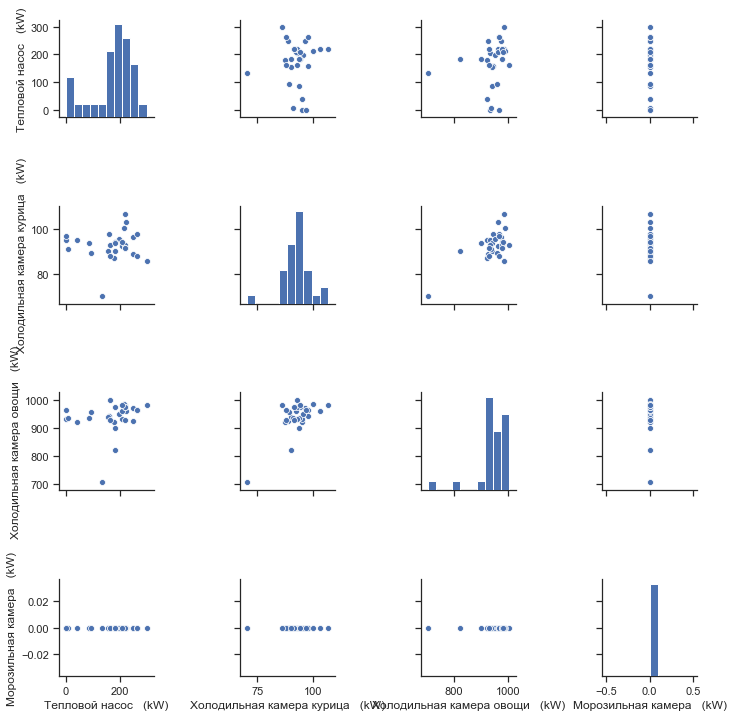

In [292]:
sns.pairplot(data=food_cool)

На глаз корелляция отсутствует, но на всякий случай - посчитаем. 

In [293]:
food_cool.corr(method='spearman')

Тепловой насос   (kW)  \
Тепловой насос   (kW)                          1.000000   
Холодильная камера курица   (kW)               0.007342   
Холодильная камера овощи   (kW)                0.396040   
Морозильная камера   (kW)                           NaN   

                                  Холодильная камера курица   (kW)  \
Тепловой насос   (kW)                                     0.007342   
Холодильная камера курица   (kW)                          1.000000   
Холодильная камера овощи   (kW)                           0.379310   
Морозильная камера   (kW)                                      NaN   

                                  Холодильная камера овощи   (kW)  \
Тепловой насос   (kW)                                     0.39604   
Холодильная камера курица   (kW)                          0.37931   
Холодильная камера овощи   (kW)                           1.00000   
Морозильная камера   (kW)                                     NaN   

                                  Морозильная камера   (kW)  
Тепловой насос   (kW)                                   NaN  
Холодильная камера курица   (kW)                        NaN  
Холодильная камера овощи   (kW)                         NaN  
Морозильная камера   (kW)                               NaN

Корелляции нет. Можно переходить к анализу следующей группы. 

### Системы кондиционирования

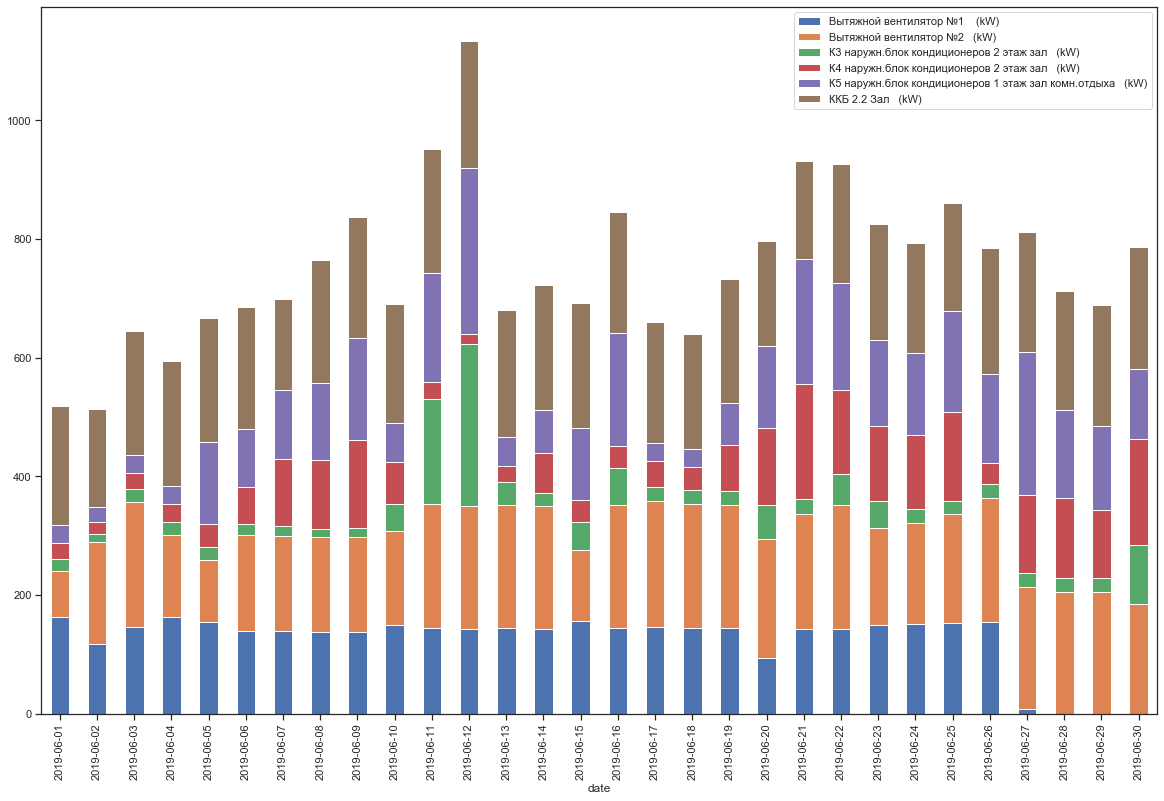

In [294]:
#Структура использования по дням
food_cond.plot(kind='bar', stacked=True, figsize=(20, 13))

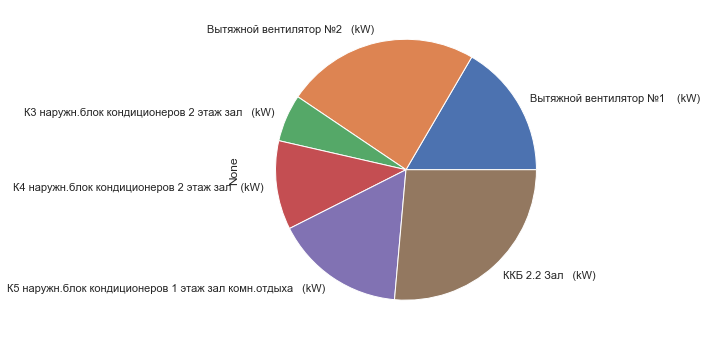

In [295]:
#Среднее использование в день
month_cond_structure = food_cond.mean(axis=0)
month_cond_structure.plot(kind='pie', figsize=(6, 6))

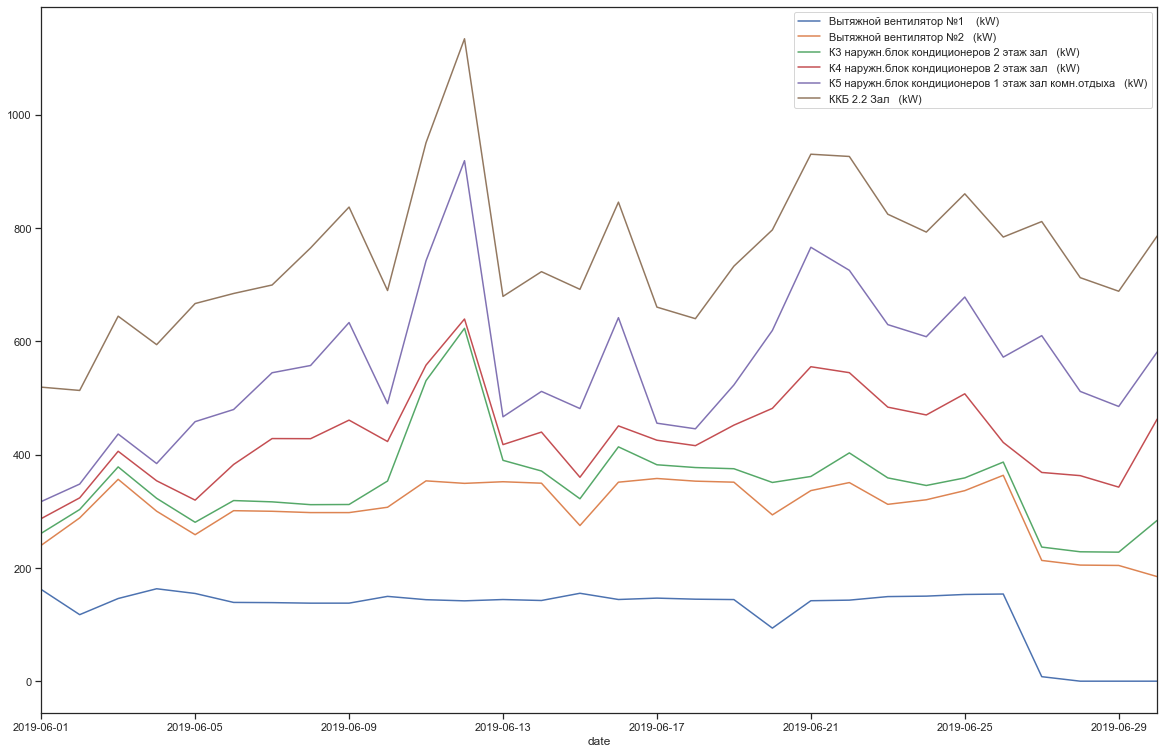

In [296]:
food_cond.plot(kind='line', stacked=True, figsize=(20, 13))

Визуально наблюдается достаточно сильная корелляция между использованием всего оборудования кондиционирования. Особенно сильно это видно в интенсивности использования всех наружных кондиционеров (что в целом, очевидно). Дополнительно стоит посмотреть температуру воздуха и интенсивность работы кухни в эти дни, чтобы сделать анализ глубже и найти точки роста. 

### Итого по группам оборудования

In [335]:
#считаем сумму по каждой группе на каждый день использования

sum_cook = food_cook.sum(axis=1)
sum_cold = food_cool.sum(axis=1)
sum_cond = food_cond.sum(axis=1)
summa = sum_cook.to_frame('Кухня')
summa['Холодильное оборудование'] = sum_cold
summa['Кондиционирование'] = sum_cond
summa.head()

Кухня  Холодильное оборудование  Кондиционирование
date                                                              
2019-06-01  1573.9604                 1263.7798           519.2323
2019-06-02  1206.1043                  907.3016           513.4136
2019-06-03  1383.4781                 1188.9096           644.5331
2019-06-04  1361.4959                 1057.9793           594.2719
2019-06-05  1491.5637                 1029.0893           666.8794

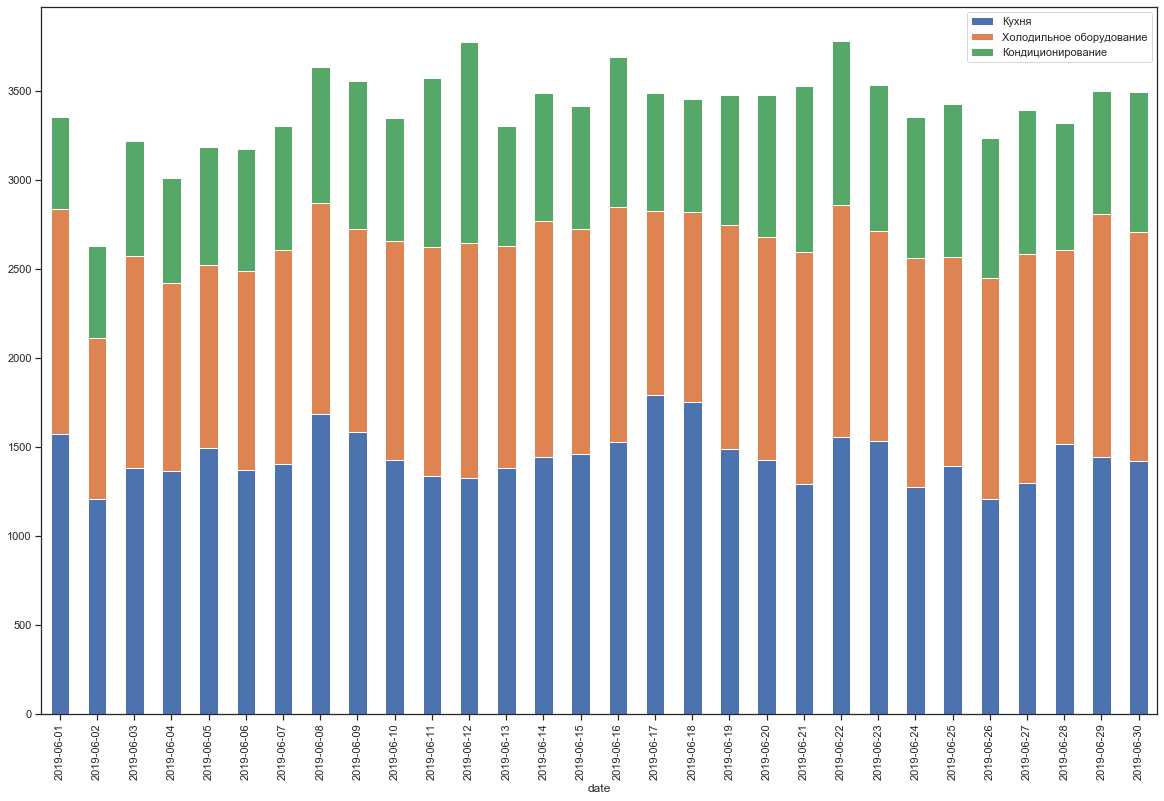

In [336]:
summa.plot(kind='bar', stacked=True, figsize=(20,13))

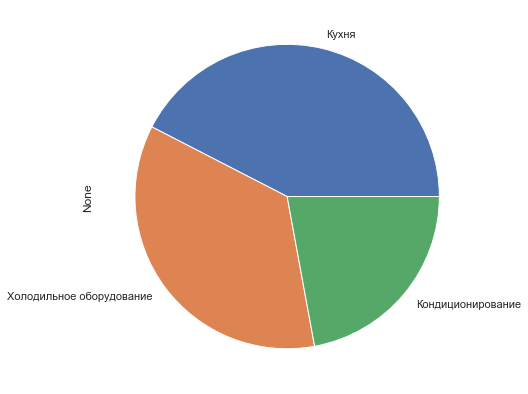

In [340]:
summa.sum(axis=0).plot(kind='pie', figsize=(7, 7))

В среднем, оборудование потребляет энергию достаточно равномерно, но уличное освещение в датасете отсутствует, поэтому итоговая картина может очень сильно отличаться. 

# Итого и ответы на все остальные вопросы.

Видно, что очень высокое потребление имеет овощная морозильная камера, к тому же имеются выбросы, причем достаточно серьезные. Дисперсия у холодильной камеры очень маленькая, а "хвост" данных уходит влево значит скорее всего - были перебои в работе оборудования. Аналогичная история и с Проточным бойлером. Не уверен, уместно ли тут будет чистить данные - с выбросами лучше разбираться в частном порядке, а потом уже возвращаться к анализу. Но можно посмотреть корелляцию "на глаз", построив pairplot, но это уже в разрезе групп оборудования. Далее посмотрим на потребление каждого вида оборудования по отдельности.

После первичного анализа можно выделить следующие аномалии: 

1) С 20х чисел нарушена работа Вытяжного Вентилятора №1. Не использовался. Также наблюдается просадка Вентилятора №2 с 06 по 09.06 Просадка была небольшая, визуально корреляция между интенсивностью работы вентиляторов отсутствует. 

2) 10-12.06, а также 30.06 наблюдалась аномальная активность кондиционера на 2-м этаже. Наружный блок второго этажа также работал неравномерно - наблюдалась скачкообразная активность. 

3) ККБ 2.1 имеет аномально высокие значения 10-14.06, а также перебои в работе 20-25 и 27-31.06. 

4) По морозильной камере, ПВ2(Зал), Щиту освещения, эл. тепловой завесам (технология, зал) данных нет - графики показывают нулевые значения. Любопытно, что первичный анализ подсчета нулевых значений это не показал. 

5) ПВ1 (Технология) перебои в работе с 21 по 25.06. 

6) Тепловой насос - перебои в работе, множественные. Возможно - это нормально, но я не очень хорошо понимаю принцип его работы. 

7) Фритюрница закрытая - перебои 10-11.06 и 18-23.06. 

8) Фритюрница картофельная №2 - Аномально высокая интенсивность работы 09.06 Резкое повышене интенсивности работы в конце месяца. Обратные значения интенсивности набюлдаются в работе фритюрницы открытой №1. Визуально - прямая корреляция. 

9) Холодильная камера (овощи) - два кратковременных сбоя в работе (падения потребления до нулевого значения). Вероятно, это входит в обычный режим эксплуатации данного оборудования. Чтобы проверить нужно посмотреть дополнительно данные по другим месяцам. 

10) Все данные примерно 03.06 имеют кратковременную просадку. Посмотрев .csv файл, там действительно есть период, когда данных нет по всему оборудованию. Нужно разбираться в частном порядке, гипотеза  - наблюдалось кратковременное отключение электроэнергии. Но - нужно проверять в частном порядке. 



Было выделено 4 подгруппы:

1) Оборудование для готовки (фритюрницы, сэндвич - станция)

2) Внешнее освещение

3) Системы кондиционирования

4) Системы сохранения продуктов питания (холодильные и морозильные камеры)

Группу данных "Внешнее освещение" анализировать не имеет смысла, так как данных по ней нет (нулевые значения)
Посмотрим на потребление и взаимозависимости в этих данных.



Так как не все данные распределены равномерно, то мы применили коэффициент корреляции Спирмена - для него не требуется нормальность распределения, и выполнено требование к размеру выборки (>= 5).
Так, мы видим, что существует слабая взаимосвязь между использованием Фритюрницы закрытой №1 и фритюрницы закрытой №2. Связь слабая, было бы хорошо исследовать подробнее. Схожим уровнем зависимости (К корр. ~0.5) также обладают: 

1) сандвич-станция в составе и фритюрница закрытая №1; 

2) сандвич-станция в составе и фритюрница закрытая №3;

3) Фритюрница закрытая №3 и фритюрница картофельная №1;

4) Фритюрица открытая №1 и фритюрница картофельная №2.

Также довольно высокую взаимосвязь показали Фритюрница открытая №1 и Фритюрница картофельная №2 (0.77)
Вероятно, эти все данные зависят от количества посетителей в ресторане, размере и структуре среднего чека. То есть - для подробного анализа недостаточно данных. 



#### Дополнительные данные для анализа:

Для анализа оборудования, использующегося в приготовлении блюд, необходимо также проанализировать наполненность ресторана и структуру среднего чека - что именно готовиться, и какой расход электроэнергии на одно блюдо.

Эти же данные нужны для оптимизации оборудования для хранения полуфабрикатов и скоропортящихся продуктов (холодильные, морозильные камеры и пр.) 

Для кондиционеров и отопления нужно знать температуру воздуха и ее динамику, площадь ресторана. 

Освещение также требует знания площади ресторана и предресторанной территории. Здесь же нужно знать данные по световому дню и городскому освещению (возможно - некоторое освещение - лишнее.) 

Также я не знаю, что такое ККБ и ПВ1-2. Нужно изучить подробнее, что это такое и как это работает. Также я не очень хорошо понимаю, что такое тепловой насос и зачем он нужен. С этим также нужно разобраться. 

Данные по температуре воздуха снимаются с кондиционеров, а также смотрится мат. ожидание в регионе с учетом поправки местности. Световой день строится по географическим координатам, также данные открытые. 

Бизнес-данные берутся у клиента. 

#### Как проверить нормальность работы оборудования?

Для того, чтобы понять, оборудование работает нормально или нет - нужно в первую очередь знать стандарты. Сколько заявлено потребление, и сколько есть на самом деле - по сути сравнить плановые и фактические показатели. Также на работу некоторых типов оборудования может влиять износ (амортизация), что приводит к менее эффективной работе. Далее смотрится потребление электроэнергии по графикам и выясняется - работает оборудование эффективно или нет. Это касается технической части, а экономическая смотрится в перспективе анализа бизнес-процессов, структуры спроса и исходя из этого - оптимизируется. 

#### Что дает для анализа наличие 10 ресторанов?
Наличие большого числа ресторанов по сути дает лучшую выборку. Проще увидеть аномалии в работе оборудования и нерациональное использование. Возможно - в каких то ресторанах стоит иное оборудование, которое показывает результат лучше, и это также можно учесть. Плюс - можно отследить, как износ оборудования влияет на его эффективность, просчитать экономику и оптимизировтаь поток денежных средств на предприятии. 

#### Что я сделаю в первый день работы?

Вопрос с подвохом. Работы на проекте или работы в компании? 

На первый вопрос - обзор, разбор бизнес-процессов и какое оборудование где используется. И главное - зачем. Далее посмотрю на общую стуктуру потребления электроэнергии и детально разберу самые "голодные" и аномальные. А далее - спускаться вниз до самых нормально-работающих аппаратов. 

Второй - познакомлюсь со всеми, с кем предстоит работать, изучу документы и разберу методологию работы. А далее - зависит от поставленных задач. 

# Спасибо :) 